In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

In [2]:
pd. set_option('display.max_rows', None)
pd. set_option('display.max_columns', 500)
pd. set_option('display.width', 1000)

In [3]:
application_data = pd.read_csv('application_data.csv')
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120          NaN           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.083037      0.262949      0.139376          0.0247            0.0369                       0.9722           0.6192          0.0143           0.00         0.0690         0.0833         0.1250        0.0369   
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291          NaN           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.311267      0.622246           NaN          0.0959            0.0529                       0.9851           0.7960          0.0605           0.08         0.0345         0.2917         0.3333        0.0130   
2      100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032      -19046           -225            -4260.0            -2531         26.0           1               1                1                 1           1           0        Laborers              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government           NaN      0.555912      0.729567             NaN               NaN                          NaN              NaN             NaN            NaN            NaN            NaN            NaN           NaN   
3      100006       0         Cash loans           F           

In [4]:
previous_application = pd.read_csv('previous_application.csv')
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0               0.0          17145.0                   SATURDAY                       15                           Y                       1                0.0               0.182832                  0.867336                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0               NaN         607500.0                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5               NaN         112500.0                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0               NaN         450000.0                     MONDAY                        7                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0               NaN         337500.0                   THURSDAY                        9                           Y                       1                NaN                    NaN                       NaN                Repairs              Refused           -781  Cash through the bank   

In [5]:
# perc = 50.0
# min_count =  int(((100-perc)/100)*application_data.shape[0] + 1)
# application_data = application_data.dropna(axis=1, thresh=min_count)

In [6]:
pd.set_option('display.max_rows', None)

In [7]:
application_data.shape

(307511, 122)

In [8]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [9]:
application_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [10]:
application_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [11]:
percent_missing = application_data.isnull().sum() * 100 / len(application_data)
missing_value_df = pd.DataFrame({'missing_no': application_data.isnull().sum(),
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending = False)
missing_value_df

missing_no  percent_missing
COMMONAREA_MEDI                   214865        69.872297
COMMONAREA_AVG                    214865        69.872297
COMMONAREA_MODE                   214865        69.872297
NONLIVINGAPARTMENTS_MODE          213514        69.432963
NONLIVINGAPARTMENTS_AVG           213514        69.432963
NONLIVINGAPARTMENTS_MEDI          213514        69.432963
FONDKAPREMONT_MODE                210295        68.386172
LIVINGAPARTMENTS_MODE             210199        68.354953
LIVINGAPARTMENTS_AVG              210199        68.354953
LIVINGAPARTMENTS_MEDI             210199        68.354953
FLOORSMIN_AVG                     208642        67.848630
FLOORSMIN_MODE                    208642        67.848630
FLOORSMIN_MEDI                    208642        67.848630
YEARS_BUILD_MEDI                  204488        66.497784
YEARS_BUILD_MODE                  204488        66.497784
YEARS_BUILD_AVG                   204488        66.497784
OWN_CAR_AGE                       202929        65.990810
LANDAREA_MEDI                     182590        59.376738
LANDAREA_MODE                     182590        59.376738
LANDAREA_AVG                      182590        59.376738
BASEMENTAREA_MEDI                 179943        58.515956
BASEMENTAREA_AVG                  179943        58.515956
BASEMENTAREA_MODE                 179943        58.515956
EXT_SOURCE_1                      173378        56.381073
NONLIVINGAREA_MODE                169682        55.179164
NONLIVINGAREA_AVG                 169682        55.179164
NONLIVINGAREA_MEDI                169682        55.179164
ELEVATORS_MEDI                    163891        53.295980
ELEVATORS_AVG                     163891        53.295980
ELEVATORS_MODE                    163891        53.295980
WALLSMATERIAL_MODE                156341        50.840783
APARTMENTS_MEDI                   156061        50.749729
APARTMENTS_AVG                    156061        50.749729
APARTMENTS_MODE                   156061        50.749729
ENTRANCES_MEDI                    154828        50.348768
ENTRANCES_AVG                     154828        50.348768
ENTRANCES_MODE                    154828        50.348768
LIVINGAREA_AVG                    154350        50.193326
LIVINGAREA_MODE                   154350        50.193326
LIVINGAREA_MEDI                   154350        50.193326
HOUSETYPE_MODE                    154297        50.176091
FLOORSMAX_MODE                    153020        49.760822
FLOORSMAX_MEDI                    153020        49.760822
FLOORSMAX_AVG                     153020        49.760822
YEARS_BEGINEXPLUATATION_MODE      150007        48.781019
YEARS_BEGINEXPLUATATION_MEDI      150007        48.781019
YEARS_BEGINEXPLUATATION_AVG       150007        48.781019
TOTALAREA_MODE                    148431        48.268517
EMERGENCYSTATE_MODE               145755        47.398304
OCCUPATION_TYPE                    96391        31.345545
EXT_SOURCE_3                       60965        19.825307
AMT_REQ_CREDIT_BUREAU_HOUR         41519        13.501631
AMT_REQ_CREDIT_BUREAU_DAY          41519        13.501631
AMT_REQ_CREDIT_BUREAU_WEEK         41519        13.501631
AMT_REQ_CREDIT_BUREAU_MON          41519        13.501631
AMT_REQ_CREDIT_BUREAU_QRT          41519        13.501631
AMT_REQ_CREDIT_BUREAU_YEAR         41519        13.501631
NAME_TYPE_SUITE                     1292         0.420148
OBS_30_CNT_SOCIAL_CIRCLE            1021         0.332021
DEF_30_CNT_SOCIAL_CIRCLE            1021         0.332021
OBS_60_CNT_SOCIAL_CIRCLE            1021         0.332021
DEF_60_CNT_SOCIAL_CIRCLE            1021         0.332021
EXT_SOURCE_2                         660         0.214626
AMT_GOODS_PRICE                      278         0.090403
AMT_ANNUITY                           12         0.003902
CNT_FAM_MEMBERS                        2         0.000650
DAYS_LAST_PHONE_CHANGE                 1         0.000325
CNT_CHILDREN                           0         0.000000
FLAG_DOCUMENT_8             

In [12]:
perc = 50.0
min_count =  int(((100-perc)/100)*application_data.shape[0] + 1)
application_data = application_data.dropna(axis=1, thresh=min_count)
application_data.shape

(307511, 81)

In [13]:
percent_missing = application_data.isnull().sum() * 100 / len(application_data)
missing_value_df = pd.DataFrame({'missing_no': application_data.isnull().sum(),
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending = False)
missing_value_df

missing_no  percent_missing
FLOORSMAX_AVG                     153020        49.760822
FLOORSMAX_MODE                    153020        49.760822
FLOORSMAX_MEDI                    153020        49.760822
YEARS_BEGINEXPLUATATION_AVG       150007        48.781019
YEARS_BEGINEXPLUATATION_MODE      150007        48.781019
YEARS_BEGINEXPLUATATION_MEDI      150007        48.781019
TOTALAREA_MODE                    148431        48.268517
EMERGENCYSTATE_MODE               145755        47.398304
OCCUPATION_TYPE                    96391        31.345545
EXT_SOURCE_3                       60965        19.825307
AMT_REQ_CREDIT_BUREAU_YEAR         41519        13.501631
AMT_REQ_CREDIT_BUREAU_HOUR         41519        13.501631
AMT_REQ_CREDIT_BUREAU_DAY          41519        13.501631
AMT_REQ_CREDIT_BUREAU_WEEK         41519        13.501631
AMT_REQ_CREDIT_BUREAU_MON          41519        13.501631
AMT_REQ_CREDIT_BUREAU_QRT          41519        13.501631
NAME_TYPE_SUITE                     1292         0.420148
DEF_30_CNT_SOCIAL_CIRCLE            1021         0.332021
OBS_60_CNT_SOCIAL_CIRCLE            1021         0.332021
DEF_60_CNT_SOCIAL_CIRCLE            1021         0.332021
OBS_30_CNT_SOCIAL_CIRCLE            1021         0.332021
EXT_SOURCE_2                         660         0.214626
AMT_GOODS_PRICE                      278         0.090403
AMT_ANNUITY                           12         0.003902
CNT_FAM_MEMBERS                        2         0.000650
DAYS_LAST_PHONE_CHANGE                 1         0.000325
FLAG_OWN_CAR                           0         0.000000
FLAG_OWN_REALTY                        0         0.000000
NAME_CONTRACT_TYPE                     0         0.000000
FLAG_DOCUMENT_2                        0         0.000000
FLAG_DOCUMENT_3                        0         0.000000
FLAG_DOCUMENT_4                        0         0.000000
FLAG_DOCUMENT_5                        0         0.000000
FLAG_DOCUMENT_6                        0         0.000000
FLAG_DOCUMENT_7                        0         0.000000
FLAG_DOCUMENT_8                        0         0.000000
FLAG_DOCUMENT_9                        0         0.000000
FLAG_DOCUMENT_10                       0         0.000000
FLAG_DOCUMENT_11                       0         0.000000
FLAG_DOCUMENT_12                       0         0.000000
FLAG_DOCUMENT_13                       0         0.000000
AMT_INCOME_TOTAL                       0         0.000000
FLAG_DOCUMENT_15                       0         0.000000
FLAG_DOCUMENT_16                       0         0.000000
FLAG_DOCUMENT_17                       0         0.000000
FLAG_DOCUMENT_18                       0         0.000000
FLAG_DOCUMENT_19                       0         0.000000
FLAG_DOCUMENT_20                       0         0.000000
FLAG_DOCUMENT_21                       0         0.000000
CNT_CHILDREN                           0         0.000000
CODE_GENDER                            0         0.000000
FLAG_DOCUMENT_14                       0         0.000000
FLAG_EMP_PHONE                         0         0.000000
AMT_CREDIT                             0         0.000000
FLAG_WORK_PHONE                        0         0.000000
FLAG_CONT_MOBILE                       0         0.000000
FLAG_PHONE                             0         0.000000
FLAG_EMAIL                             0         0.000000
FLAG_MOBIL                             0         0.000000
REGION_RATING_CLIENT                   0         0.000000
REGION_RATING_CLIENT_W_CITY            0         0.000000
WEEKDAY_APPR_PROCESS_START             0         0.000000
HOUR_APPR_PROCESS_START                0         0.000000
REG_REGION_NOT_LIVE_REGION             0         0.000000
REG_REGION_NOT_WORK_REGION             0         0.000000
LIVE_REGION_NOT_WORK_REGION            0         0.000000
REG_CITY_NOT_LIVE_CITY                 0         0.000000
REG_CITY_NOT_WORK_CITY                 0         0.000000
LIVE_CITY_NOT_WORK_CITY     

In [14]:
application_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


In [15]:
application_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE               

In [16]:
numeric = application_data._get_numeric_data().columns
numeric_list = list(numeric)
numeric_list
# numeric_df = pd.DataFrame(numeric_list)
# numeric_df

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'F

In [17]:
for x in numeric_list:
    application_data[x].fillna(application_data[x].median(), inplace = True)

In [18]:
application_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                          0
AMT_GOODS_PRICE                      0
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE               

In [19]:
application_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


In [20]:
categorical_list = list(set(application_data.columns) - set(numeric))
categorical_list

['CODE_GENDER',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_EDUCATION_TYPE',
 'ORGANIZATION_TYPE',
 'FLAG_OWN_CAR',
 'NAME_TYPE_SUITE',
 'NAME_CONTRACT_TYPE',
 'EMERGENCYSTATE_MODE',
 'NAME_HOUSING_TYPE',
 'FLAG_OWN_REALTY',
 'OCCUPATION_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_FAMILY_STATUS']

In [21]:
for x in categorical_list:
    application_data[x].fillna(application_data[x].mode()[0], inplace = True)

In [22]:
application_data.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_

Missing values are handled in the application_data file using mode and median method for categorical and continuous variables respectively.
Defined a threshold of 50% and dropped the columns which has morethan 50% of missing values and reduced the number of columns from 122 to 81.

# Identifying Outlier

In [23]:
application_data.boxplot(column = 'AMT_INCOME_TOTAL')
plt.show()

C:\Users\malin\AppData\Local\Temp/ipykernel_13880/2524018689.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


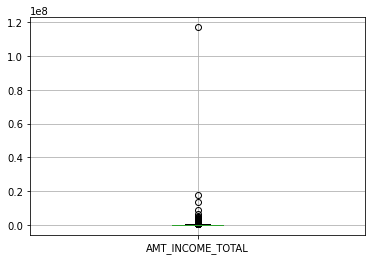

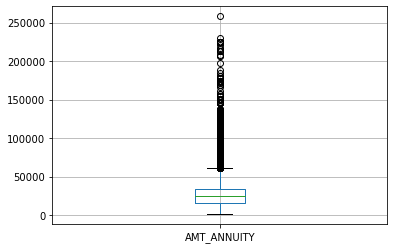

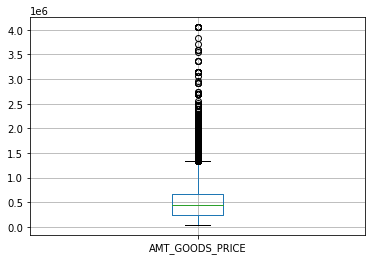

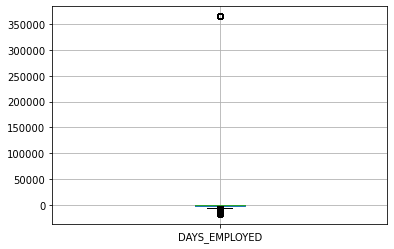

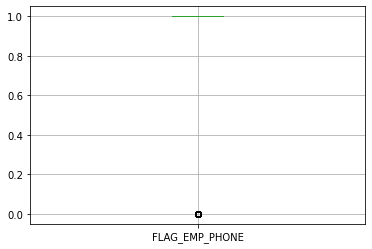

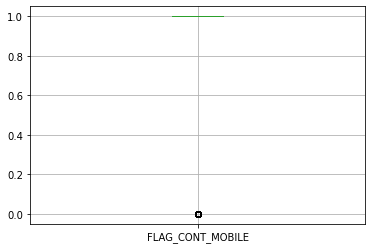

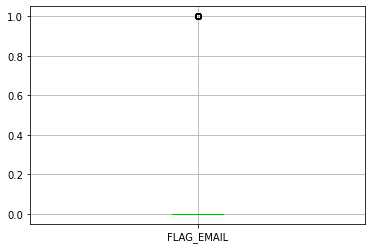

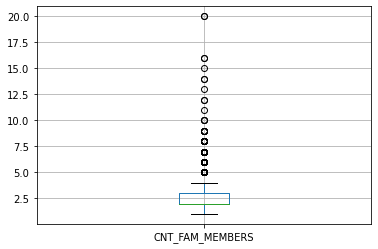

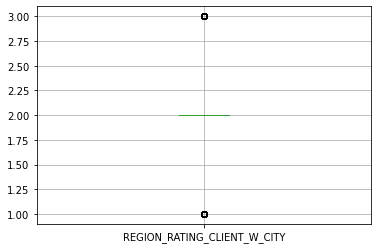

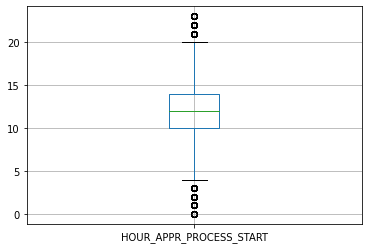

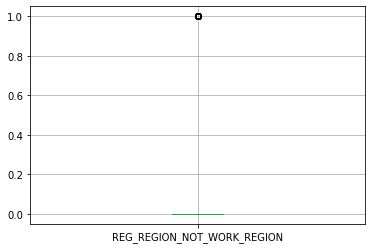

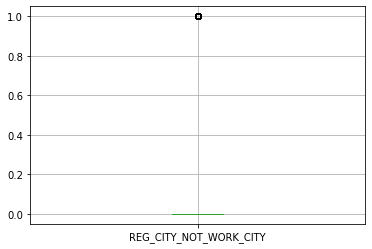

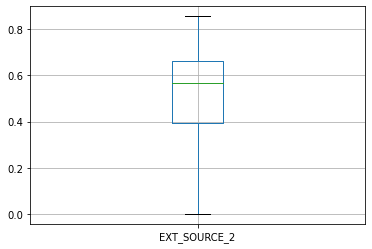

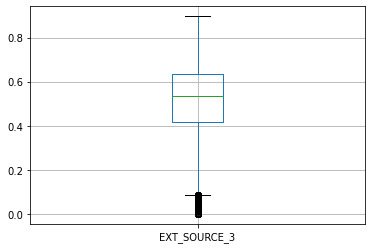

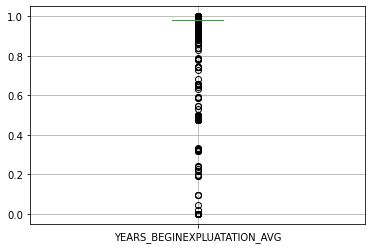

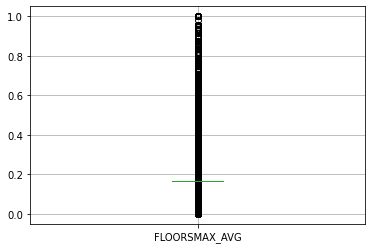

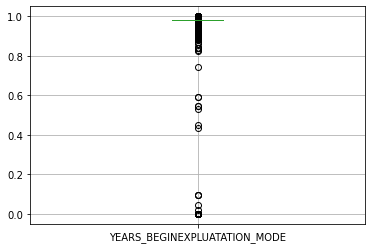

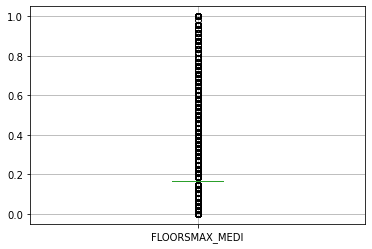

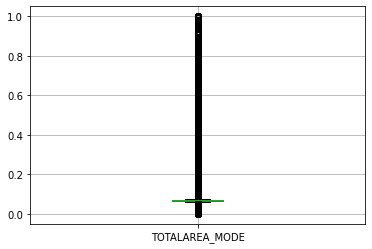

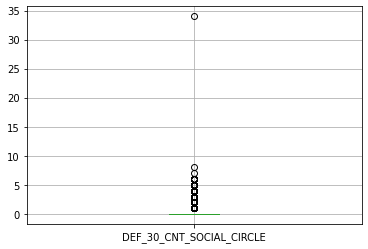

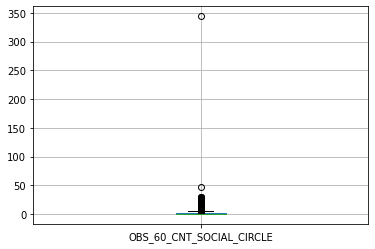

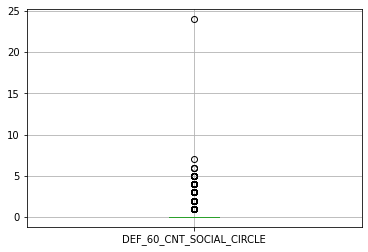

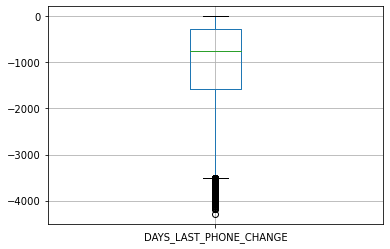

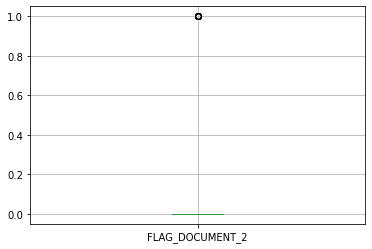

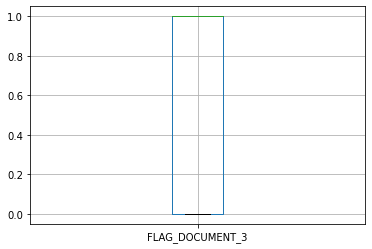

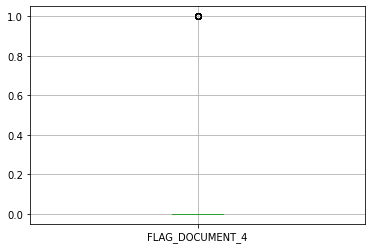

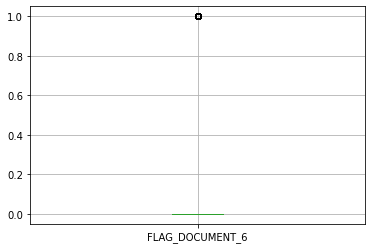

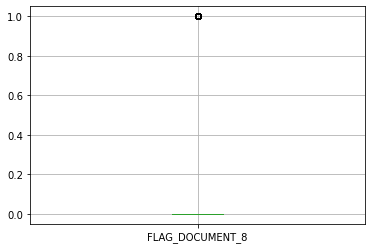

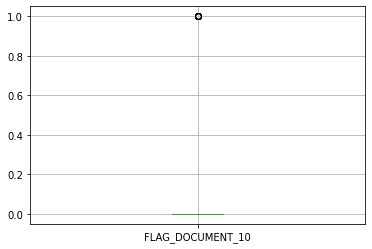

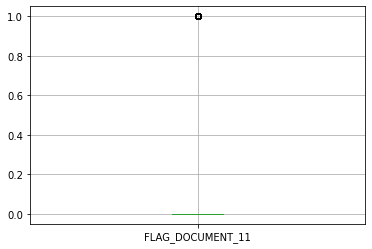

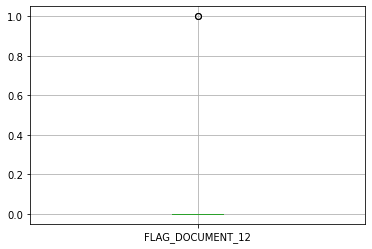

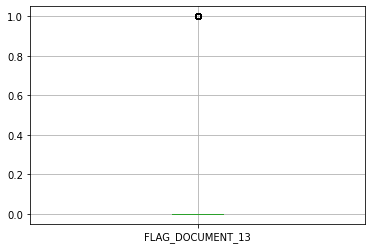

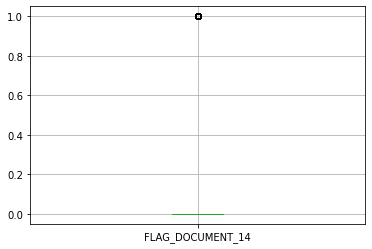

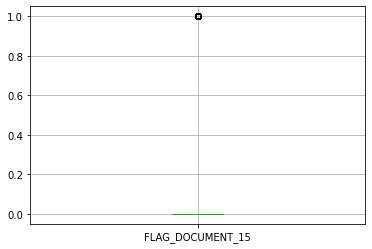

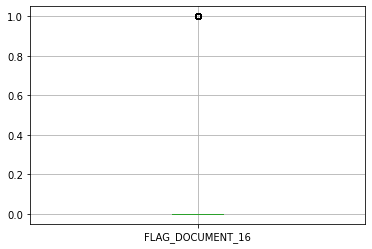

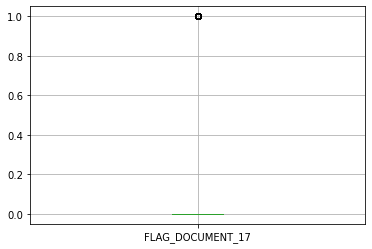

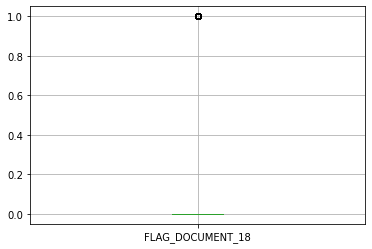

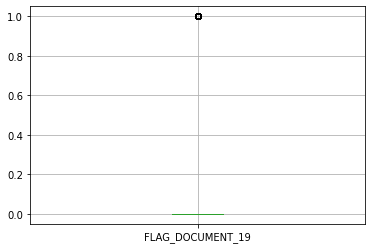

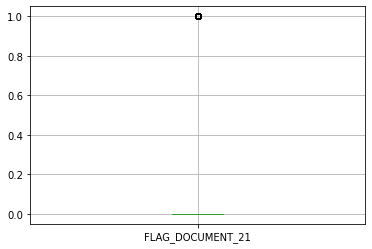

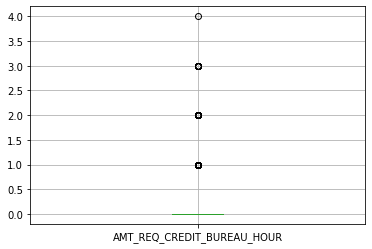

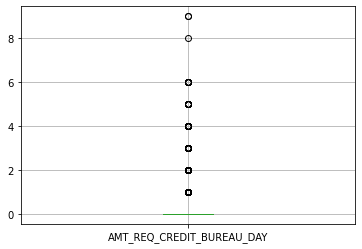

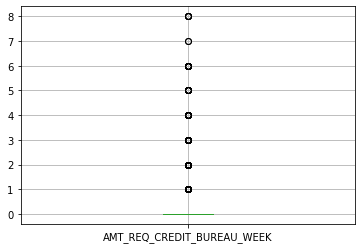

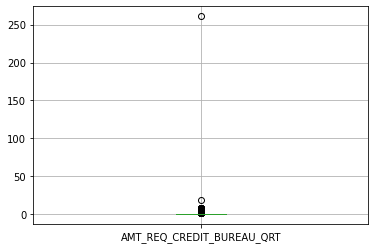

In [24]:
# sns.boxplot(data = pd.melt(application_data))
for columns in numeric_list:
    plt.figure()
    application_data.boxplot([columns])

Here we ahve plotted box plots for all the numeric variables for analysing the outliers. We could see that some variables like "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", AMT_GOODS_PRICE, "DAYS_EMPLOYED", etc are having outliers. Some values are highly deviating from the median.

In [25]:
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  \
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.262949      0.139376                       0.9722         0.0833                        0.9722          0.0833                        0.9722          0.0833          0.0149                  No                       2.0   
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.622246      0.535276                       0.9851         0.2917                        0.9851          0.2917                        0.9851          0.2917          0.0714                  No                       1.0   
2      100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032      -19046           -225            -4260.0            -2531           1               1                1                 1           1           0        Laborers              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government      0.555912      0.729567                       0.9816         0.1667                        0.9816          0.1667                        0.9816          0.1667          0.0688                  No                       0.0   
3      100006       0         Cash loans           F       

In [26]:
application_data['TARGET'].value_counts()
# data imbalance ratio is 92:8

0    282686
1     24825
Name: TARGET, dtype: int64

In [27]:
round(282686/24825)

11

The data imbalance ratio is 11.

# Identifying important variables

In [28]:
corr_matrix=application_data.corr()
corr_matrix

SK_ID_CURR    TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  \
SK_ID_CURR                      1.000000 -0.002108     -0.001129         -0.001820   -0.000343    -0.000431        -0.000258                    0.000849   -0.001500       0.001366          -0.000973        -0.000384    0.002804       -0.001337        -0.000415          0.002815    0.002753    0.000281        -0.002895             -0.001075                    -0.001138                 0.000350                   -0.000283                    0.001097                     0.002903               -0.001885               -0.001582                 0.000067      0.002319      0.000184                     0.001072       0.003550                      0.001312        0.003233                      0.000941    3.370552e-03        0.001861                 -0.001413                 -0.000085                 -0.001427                  0.001182               -0.000859         0.000700        -0.003411        -0.004139        -0.001097         0.002121        -0.002694         0.001809         0.001505   
TARGET                         -0.002108  1.000000      0.019187         -0.003982   -0.030369    -0.012815        -0.039623                   -0.037227    0.078239      -0.044932           0.041975         0.051457    0.000534        0.045982         0.028524          0.000370   -0.023806   -0.001758         0.009308              0.058899                     0.060893                -0.024166                    0.005576                    0.006942                     0.002819                0.044395                0.050994                 0.032518     -0.160295     -0.155892                    -0.004665      -0.039385                     -0.004061       -0.038377                     -0.004872   -3.915721e-02       -0.030214                  0.009447                  0.032394                  0.009337                  0.031401                0.055218         0.005417         0.044346        -0.002672        -0.000316        -0.028602        -0.001520        -0.008040        -0.004352   
CNT_CHILDREN                   -0.001129  0.019187      1.000000          0.012882    0.002145     0.021377        -0.001856                   -0.025573    0.330938      -0.239818           0.183395        -0.028019    0.001041        0.240714         0.055630         -0.000794   -0.029906    0.022619         0.879160              0.025423                     0.024781                -0.007292                   -0.013319                    0.008185                     0.014835                0.020072                0.070650                 0.069957     -0.017990     -0.039543                     0.006403      -0.016865                      0.006058       -0.016196                      0.006037   -1.661135e-02       -0.013467                  0.015662                 -0.001205                  0.015302                 -0.001811               -0.005866         0.001786         0.056837        -0.003709        -0.016737        -0.157024        -0.001498         0.051697        -0.001997   
AMT_INCOME_TOTAL          

In [29]:
corr_matrix["TARGET"].sort_values(ascending=False)

TARGET                          1.000000
DAYS_BIRTH                      0.078239
REGION_RATING_CLIENT_W_CITY     0.060893
REGION_RATING_CLIENT            0.058899
DAYS_LAST_PHONE_CHANGE          0.055218
DAYS_ID_PUBLISH                 0.051457
REG_CITY_NOT_WORK_CITY          0.050994
FLAG_EMP_PHONE                  0.045982
REG_CITY_NOT_LIVE_CITY          0.044395
FLAG_DOCUMENT_3                 0.044346
DAYS_REGISTRATION               0.041975
LIVE_CITY_NOT_WORK_CITY         0.032518
DEF_30_CNT_SOCIAL_CIRCLE        0.032394
DEF_60_CNT_SOCIAL_CIRCLE        0.031401
FLAG_WORK_PHONE                 0.028524
CNT_CHILDREN                    0.019187
AMT_REQ_CREDIT_BUREAU_YEAR      0.012161
OBS_30_CNT_SOCIAL_CIRCLE        0.009447
OBS_60_CNT_SOCIAL_CIRCLE        0.009337
CNT_FAM_MEMBERS                 0.009308
REG_REGION_NOT_WORK_REGION      0.006942
REG_REGION_NOT_LIVE_REGION      0.005576
FLAG_DOCUMENT_2                 0.005417
FLAG_DOCUMENT_21                0.003709
LIVE_REGION_NOT_

Some if the important variables in application_data data set are NAME_CONTRACT_TYPE, CODE_GENDER, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, DAYS_BIRTH, DAYS_EMPLOYED, OCCUPATION_TYPE, ORGANIZATION_TYPE, REGION_RATING_CLIENT_W_CITY, REGION_RATING_CLIENT, CNT_FAM_MEMBERS, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_CITY_NOT_WORK_CITY, DAYS_REGISTRATION

# Univariate Analysis

In [30]:
sns.countplot(application_data.NAME_CONTRACT_TYPE)
plt.show()

C:\Users\malin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


C:\Users\malin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


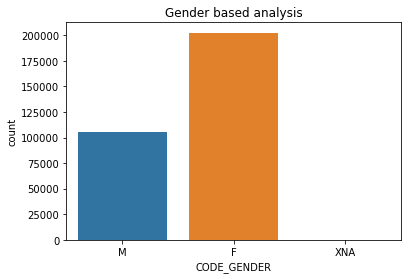

In [31]:
sns.countplot(application_data.CODE_GENDER)
plt.title('Gender based analysis')
plt.show()

In [32]:
sns.countplot(application_data.AMT_INCOME_TOTAL)
plt.show()

C:\Users\malin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [33]:
application_data['Amount_Income_Bucket'] = pd.qcut(application_data['AMT_INCOME_TOTAL'], [0,0.2,0.4,0.6,0.8,1], ['Very Low', 'Low', 'Medium', 'High', 'Very High'])
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  \
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.262949      0.139376                       0.9722         0.0833                        0.9722          0.0833                        0.9722          0.0833          0.0149                  No                       2.0   
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.622246      0.535276                       0.9851         0.2917                        0.9851          0.2917                        0.9851          0.2917          0.0714                  No                       1.0   
2      100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032      -19046           -225            -4260.0            -2531           1               1                1                 1           1           0        Laborers              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government      0.555912      0.729567                       0.9816         0.1667                        0.9816          0.1667                        0.9816          0.1667          0.0688                  No                       0.0   
3      100006       0         Cash loans           F       

C:\Users\malin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


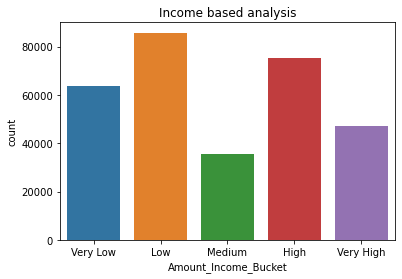

In [34]:
sns.countplot(application_data.Amount_Income_Bucket)
plt.title('Income based analysis')
plt.show()

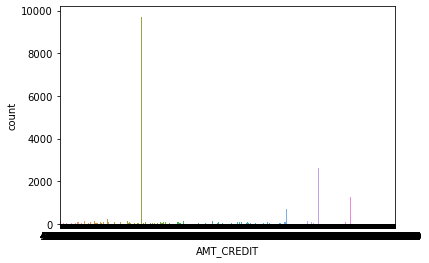

In [35]:
sns.countplot(application_data.AMT_CREDIT)
plt.show()

In [36]:
application_data['Amount_Credit_Bucket'] = pd.qcut(application_data['AMT_CREDIT'], [0,0.2,0.4,0.6,0.8,1], ['Very Low', 'Low', 'Medium', 'High', 'Very High'])
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  \
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.262949      0.139376                       0.9722         0.0833                        0.9722          0.0833                        0.9722          0.0833          0.0149                  No                       2.0   
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.622246      0.535276                       0.9851         0.2917                        0.9851          0.2917                        0.9851          0.2917          0.0714                  No                       1.0   
2      100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032      -19046           -225            -4260.0            -2531           1               1                1                 1           1           0        Laborers              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government      0.555912      0.729567                       0.9816         0.1667                        0.9816          0.1667                        0.9816          0.1667          0.0688                  No                       0.0   
3      100006       0         Cash loans           F       

C:\Users\malin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


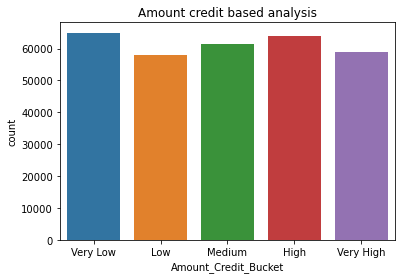

In [37]:
sns.countplot(application_data.Amount_Credit_Bucket)
plt.title('Amount credit based analysis')
plt.show()

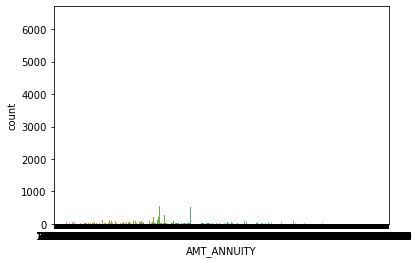

In [38]:
sns.countplot(application_data. AMT_ANNUITY)
plt.show()

C:\Users\malin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


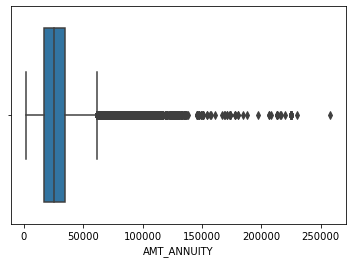

In [39]:
# application_data['Amount_Annuity_Bucket'] = pd.qcut(application_data['AMT_CREDIT'], [0,0.2,0.4,0.6,0.8,1], ['Very Low', 'Low', 'Medium', 'High', 'Very High'])
# application_data.head()
sns.boxplot(application_data. AMT_ANNUITY)
plt.show()

C:\Users\malin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


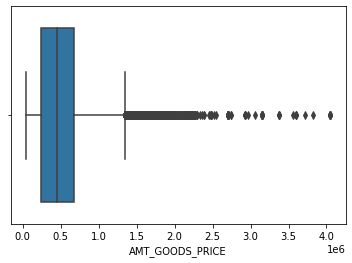

In [40]:
sns.boxplot(application_data. AMT_GOODS_PRICE)
plt.show()

C:\Users\malin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


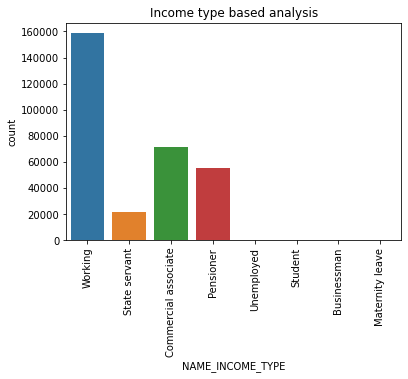

In [41]:
sns.countplot(application_data. NAME_INCOME_TYPE)
plt.title('Income type based analysis')
plt.xticks(rotation=90)
plt.show()

C:\Users\malin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


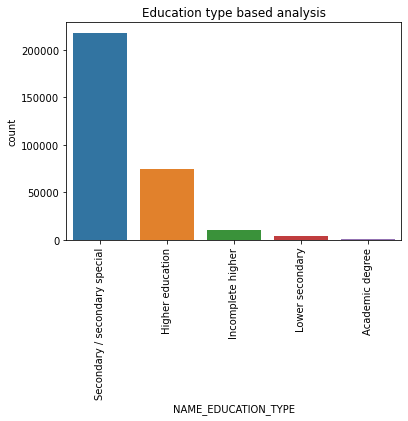

In [42]:
sns.countplot(application_data. NAME_EDUCATION_TYPE)
plt.title('Education type based analysis')
plt.xticks(rotation=90)
plt.show()

In [43]:
sns.countplot(application_data. NAME_FAMILY_STATUS)
plt.title('Family status based analysis')
plt.xticks(rotation=90)
plt.show()

C:\Users\malin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


C:\Users\malin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


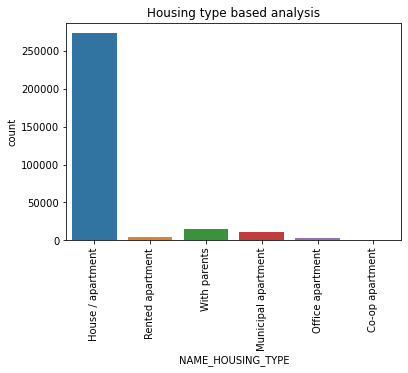

In [44]:
sns.countplot(application_data. NAME_HOUSING_TYPE)
plt.title('Housing type based analysis')
plt.xticks(rotation=90)
plt.show()

Age is given in negative and in days. So, we have to convert days to years and find the absolute

In [45]:
# Age is negative and in days. Conerting age to years
application_data['DAYS_BIRTH'] = application_data['DAYS_BIRTH'].apply(lambda x : abs(x/365))

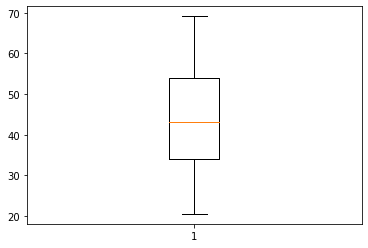

In [46]:
bp = plt.boxplot(application_data['DAYS_BIRTH'])
plt.show()

In [47]:
bp['medians'][0].get_ydata()[1]
# infer: the average age of customer hetting loan is 43 years.

43.15068493150685

In [48]:
# infer: Most of the customers who have availaed loan is between 34 to 53

In [49]:
IQR = 53.923288 - 34.008219
IQR

19.915069000000003

In [50]:
application_data['DAYS_BIRTH'].describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [51]:
application_data['DAYS_EMPLOYED'] = application_data['DAYS_EMPLOYED'].apply(lambda x : abs(x))
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  \
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801   25.920548            637            -3648.0            -2120           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.262949      0.139376                       0.9722         0.0833                        0.9722          0.0833                        0.9722          0.0833          0.0149                  No                       2.0   
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541   45.931507           1188            -1186.0             -291           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.622246      0.535276                       0.9851         0.2917                        0.9851          0.2917                        0.9851          0.2917          0.0714                  No                       1.0   
2      100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032   52.180822            225            -4260.0            -2531           1               1                1                 1           1           0        Laborers              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government      0.555912      0.729567                       0.9816         0.1667                        0.9816          0.1667                        0.9816          0.1667          0.0688                  No                       0.0   
3      100006       0         Cash loans           F       

C:\Users\malin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


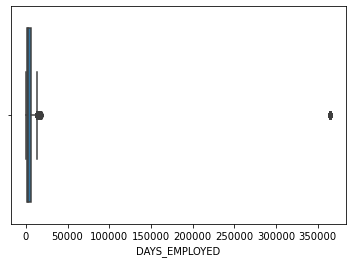

In [52]:
sns.boxplot(application_data.DAYS_EMPLOYED)
plt.show()

C:\Users\malin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


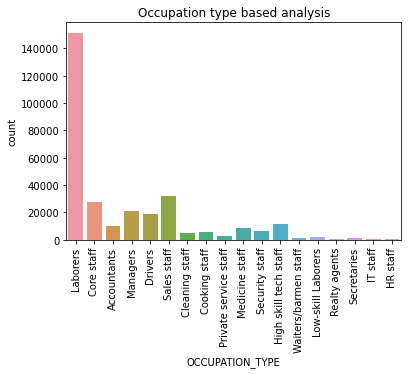

In [53]:
sns.countplot(application_data.OCCUPATION_TYPE)
plt.title('Occupation type based analysis')
plt.xticks(rotation=90)
plt.show()

C:\Users\malin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


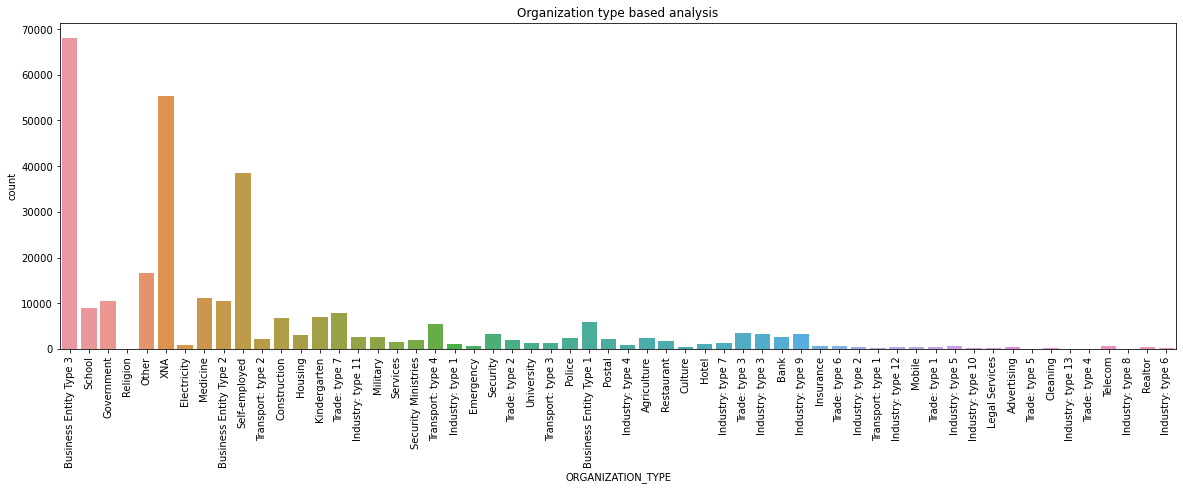

In [54]:
plt.figure(figsize=[20,6])
sns.countplot(application_data.ORGANIZATION_TYPE)
plt.title('Organization type based analysis')
plt.xticks(rotation=90)
plt.show()

C:\Users\malin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


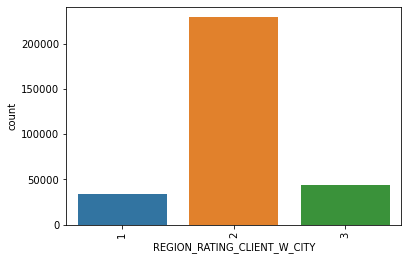

In [55]:
sns.countplot(application_data.REGION_RATING_CLIENT_W_CITY)
plt.xticks(rotation=90)
plt.show()

C:\Users\malin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


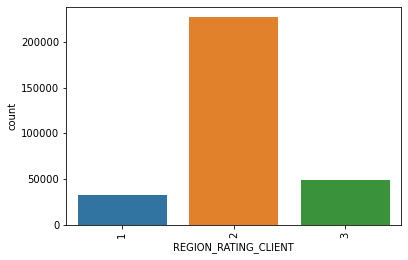

In [56]:
sns.countplot(application_data.REGION_RATING_CLIENT)
plt.xticks(rotation=90)
plt.show()

C:\Users\malin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


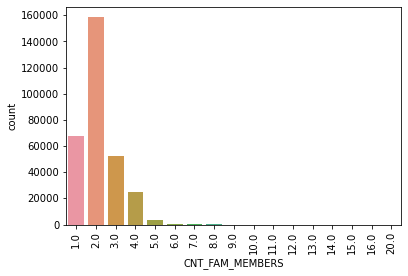

In [57]:
sns.countplot(application_data.CNT_FAM_MEMBERS)
plt.xticks(rotation=90)
plt.show()

C:\Users\malin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


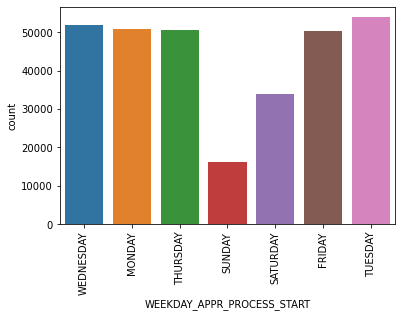

In [58]:
sns.countplot(application_data.WEEKDAY_APPR_PROCESS_START)
plt.xticks(rotation=90)
plt.show()

C:\Users\malin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


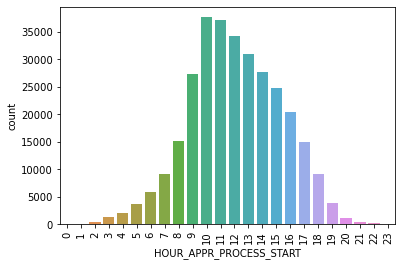

In [59]:
sns.countplot(application_data.HOUR_APPR_PROCESS_START)
plt.xticks(rotation=90)
plt.show()

C:\Users\malin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


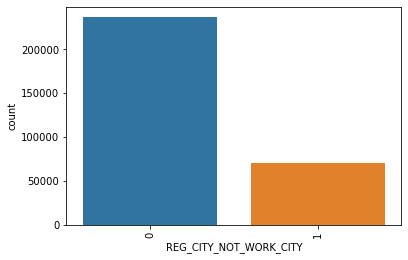

In [60]:
sns.countplot(application_data.REG_CITY_NOT_WORK_CITY)
plt.xticks(rotation=90)
plt.show()

C:\Users\malin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


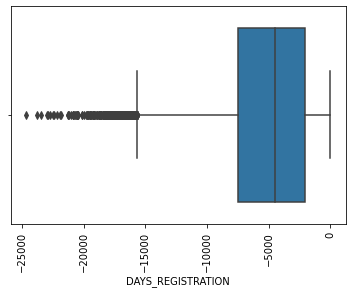

In [61]:
sns.boxplot(application_data.DAYS_REGISTRATION)
plt.xticks(rotation=90)
plt.show()

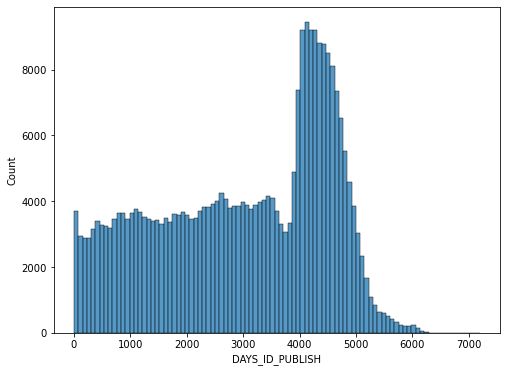

In [62]:
plt.figure(figsize=[8,6])
sns.histplot(abs(application_data['DAYS_ID_PUBLISH']))
plt.show()

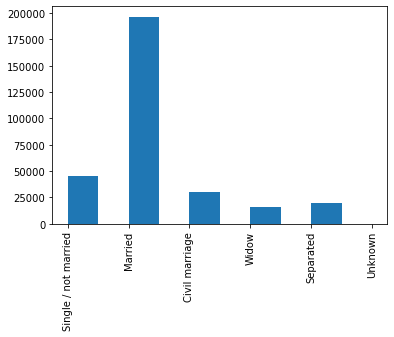

In [63]:
plt.hist(application_data['NAME_FAMILY_STATUS'])
plt.xticks(rotation=90)
plt.show()

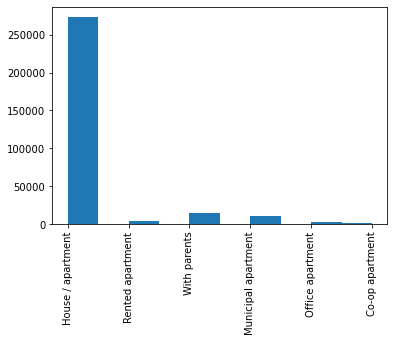

In [64]:
plt.hist(application_data['NAME_HOUSING_TYPE'])
plt.xticks(rotation=90)
plt.show()

### Bivariate Analysis

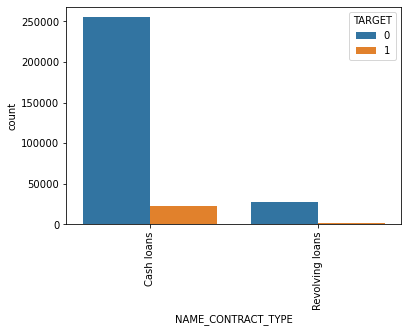

In [65]:
sns.countplot(data=application_data, x = 'NAME_CONTRACT_TYPE',hue = 'TARGET')
plt.xticks(rotation=90)
plt.show()

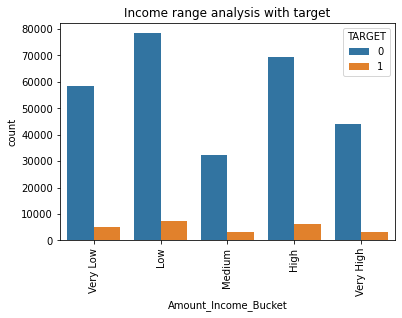

In [66]:
sns.countplot(data=application_data, x = 'Amount_Income_Bucket',hue = 'TARGET')
plt.title('Income range analysis with target')
plt.xticks(rotation=90)
plt.show()

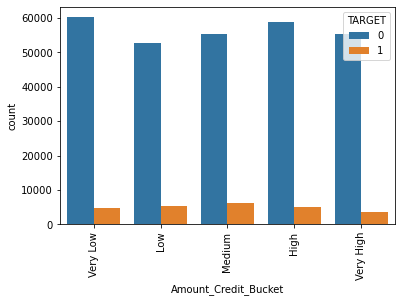

In [67]:
sns.countplot(data=application_data, x = 'Amount_Credit_Bucket',hue = 'TARGET')
plt.xticks(rotation=90)
plt.show()

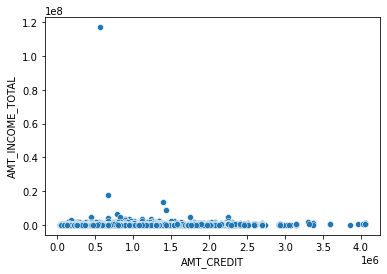

In [68]:
sns.scatterplot(data = application_data, x='AMT_CREDIT', y='AMT_INCOME_TOTAL')
plt.show()

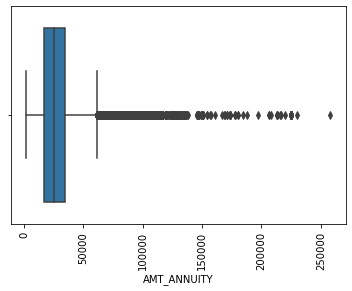

In [69]:
sns.boxplot(data=application_data, x = 'AMT_ANNUITY',hue = 'TARGET')
plt.xticks(rotation=90)
plt.show()

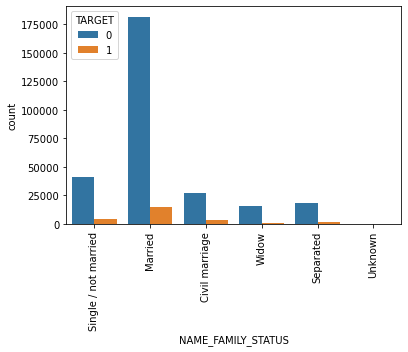

In [70]:
sns.countplot(data=application_data, x = 'NAME_FAMILY_STATUS',hue = 'TARGET')
plt.xticks(rotation=90)
plt.show()

In [71]:
application_data['Age_bucket'] = pd.cut(application_data.DAYS_BIRTH, [0,10,20,30,40,50,60,70,80,90,100], ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])

In [72]:
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  \
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801   25.920548            637            -3648.0            -2120           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.262949      0.139376                       0.9722         0.0833                        0.9722          0.0833                        0.9722          0.0833          0.0149                  No                       2.0   
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541   45.931507           1188            -1186.0             -291           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.622246      0.535276                       0.9851         0.2917                        0.9851          0.2917                        0.9851          0.2917          0.0714                  No                       1.0   
2      100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032   52.180822            225            -4260.0            -2531           1               1                1                 1           1           0        Laborers              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government      0.555912      0.729567                       0.9816         0.1667                        0.9816          0.1667                        0.9816          0.1667          0.0688                  No                       0.0   
3      100006       0         Cash loans           F       

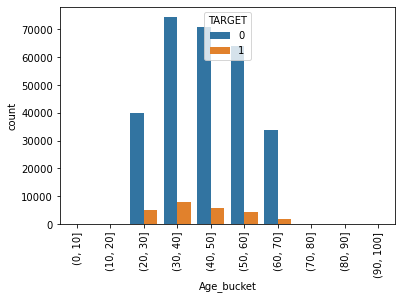

In [73]:
sns.countplot(data=application_data, x = 'Age_bucket',hue = 'TARGET')
plt.xticks(rotation=90)
plt.show()

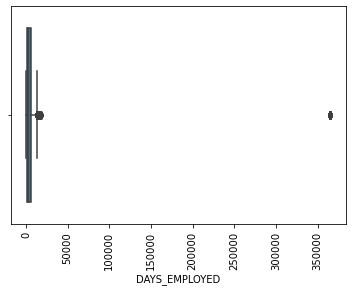

In [74]:
sns.boxplot(data=application_data, x = 'DAYS_EMPLOYED',hue = 'TARGET')
plt.xticks(rotation=90)
plt.show()

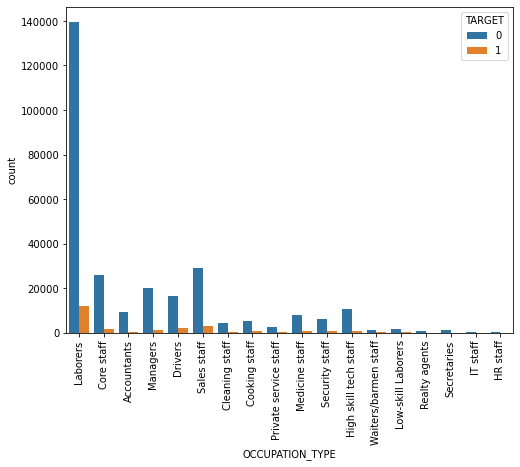

In [75]:
plt.figure(figsize=[8,6])
sns.countplot(data=application_data, x = 'OCCUPATION_TYPE',hue = 'TARGET')
plt.xticks(rotation=90)
plt.show()

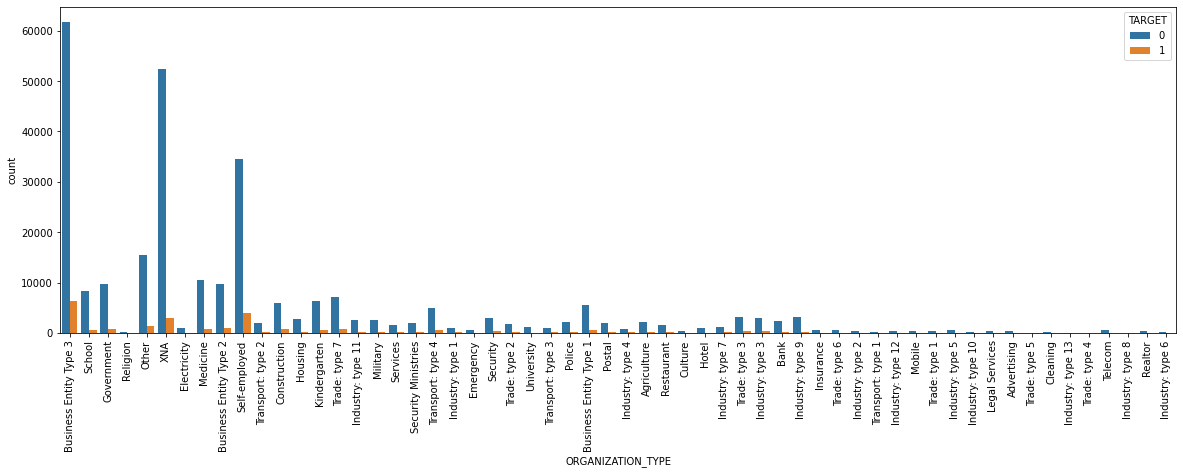

In [76]:
plt.figure(figsize=[20,6])
sns.countplot(data=application_data, x = 'ORGANIZATION_TYPE',hue = 'TARGET')
plt.xticks(rotation=90)
plt.show()

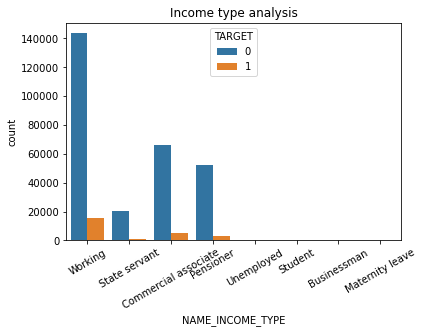

In [77]:
sns.countplot(data=application_data, x = 'NAME_INCOME_TYPE',hue = 'TARGET')
plt.title('Income type analysis')
plt.xticks(rotation=30)
plt.show()

Text(0.5, 1.0, 'Income type analysis')

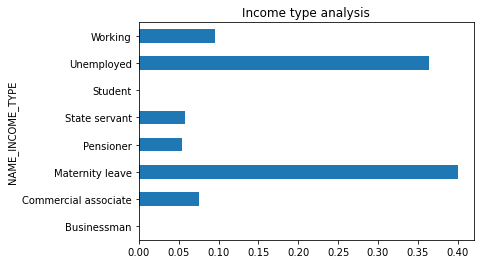

In [78]:
application_data.groupby(['NAME_INCOME_TYPE'])['TARGET'].mean().plot.barh()
plt.title('Income type analysis')

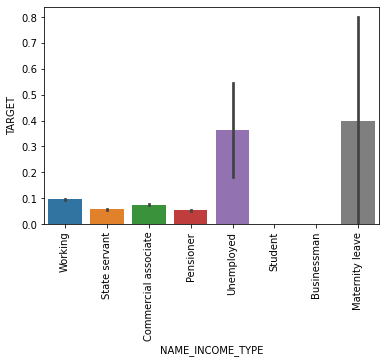

In [79]:
sns.barplot(data=application_data, x = 'NAME_INCOME_TYPE',y = 'TARGET')
plt.xticks(rotation=90)
plt.show()

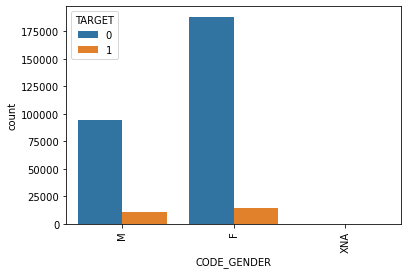

In [80]:
sns.countplot(data=application_data, x = 'CODE_GENDER',hue = 'TARGET')
plt.xticks(rotation=90)
plt.show()

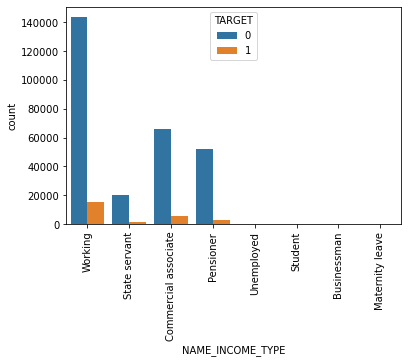

In [81]:
sns.countplot(data=application_data, x = 'NAME_INCOME_TYPE',hue = 'TARGET')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Gender analysis')

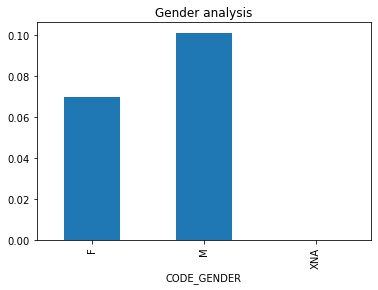

In [82]:
application_data.groupby(['CODE_GENDER'])['TARGET'].mean().plot.bar()
plt.xticks(rotation=90)
plt.title('Gender analysis')

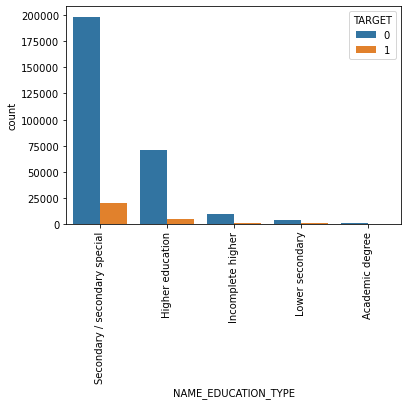

In [83]:
sns.countplot(data=application_data, x = 'NAME_EDUCATION_TYPE',hue = 'TARGET')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Education type analysis')

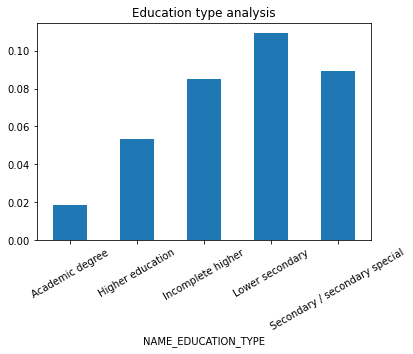

In [84]:
application_data.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].mean().plot.bar()
plt.xticks(rotation=30)
plt.title('Education type analysis')

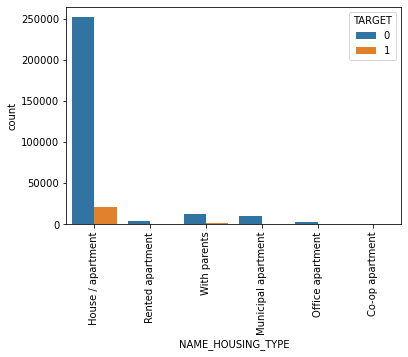

In [85]:
sns.countplot(data=application_data, x = 'NAME_HOUSING_TYPE',hue = 'TARGET')
plt.xticks(rotation=90)
plt.show()

In [86]:
# application_data['Age_bucket'] = pd.cut(application_data.DAYS_BIRTH, [0,10,20,30,40,50,60,70,80,90,100], ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])


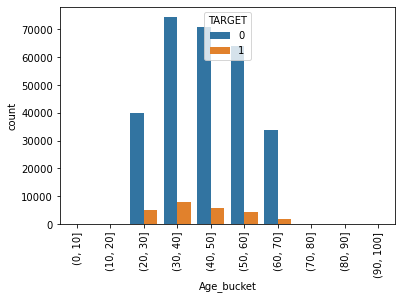

In [87]:
sns.countplot(data=application_data, x = 'Age_bucket',hue = 'TARGET')
plt.xticks(rotation=90)
plt.show()

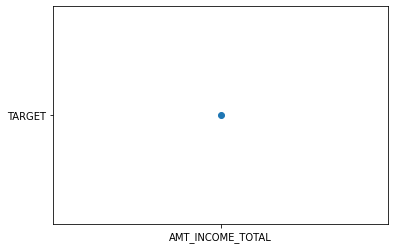

In [88]:
plt.scatter(x='AMT_INCOME_TOTAL', y='TARGET')

C:\Users\malin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


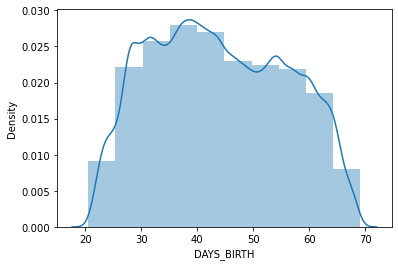

In [89]:
sns.distplot(application_data['DAYS_BIRTH'],bins = 10)
plt.show()
#normally skewed

# Segmented data analysis

In [90]:
df1 = application_data[application_data['TARGET'] == 0]
df2 = application_data[application_data['TARGET'] == 1]

In [91]:
df1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  \
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0           Family    State servant               Higher education               Married  House / apartment                    0.003541   45.931507           1188            -1186.0             -291           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.622246      0.535276                       0.9851         0.2917                        0.9851          0.2917                        0.9851          0.2917          0.0714                  No                       1.0   
2      100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0    Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032   52.180822            225            -4260.0            -2531           1               1                1                 1           1           0        Laborers              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government      0.555912      0.729567                       0.9816         0.1667                        0.9816          0.1667                        0.9816          0.1667          0.0688                  No                       0.0   
3      100006       0         Cash loans           F            N               Y             0          135000.0    312682.5      29686.5         297000.0    Unaccompanied          Working  Secondary / secondary special        Civil marriage  House / apartment                    0.008019   52.068493           3039            -9833.0            -2437           1               1                0                 1           0           0        Laborers              2.0                     2                            2                  WEDNESDAY                       17                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.650442      0.535276                       0.9816         0.1667                        0.9816          0.1667                        0.9816          0.1667          0.0688                  No                       2.0   
4      100007       0         Cash loans           M   

In [92]:
df2.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  \
0       100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801   25.920548            637            -3648.0            -2120           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.262949      0.139376                       0.9722         0.0833                        0.9722          0.0833                        0.9722          0.0833          0.0149                  No                       2.0   
26      100031       1         Cash loans           F            N               Y             0          112500.0    979992.0      27076.5         702000.0   Unaccompanied               Working  Secondary / secondary special                 Widow  House / apartment                    0.018029   51.298630           2628            -6573.0            -1827           1               1                0                 1           0           0   Cooking staff              1.0                     3                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.548477      0.190706                       0.9732         0.0417                        0.9732          0.0417                        0.9732          0.0417          0.0085                 Yes                      10.0   
40      100047       1         Cash loans           M            N               Y             0          202500.0   1193580.0      35028.0         855000.0   Unaccompanied  Commercial associate  Secondary / secondary special               Married  House / apartment                    0.025164   47.895890           1262            -1182.0            -1029           1               1                0                 1           0           0        Laborers              2.0                     2                            2                    TUESDAY                        9                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.306841      0.320163                       0.9960         0.2500                        0.9960          0.2500                        0.9960          0.2500          0.1463                  No                       0.0   
42      100049       1         Cash 

In [93]:
def percent_df1(ax):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/float(len(df1)))
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')

In [94]:
def percent_df2(ax):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/float(len(df2)))
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')

<AxesSubplot:>

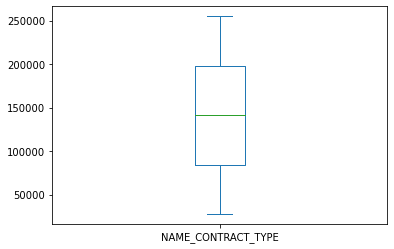

In [95]:
df1['NAME_CONTRACT_TYPE'].value_counts().plot.box()

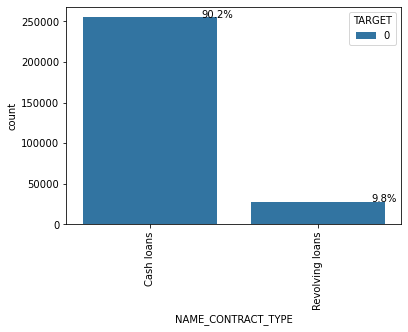

In [96]:
percent_df1(sns.countplot(data=df1, x = 'NAME_CONTRACT_TYPE',hue = 'TARGET'))
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

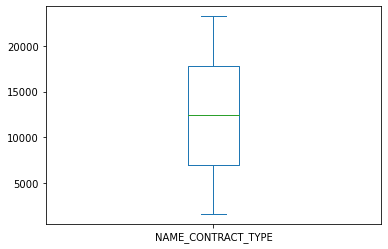

In [97]:
df2['NAME_CONTRACT_TYPE'].value_counts().plot.box()

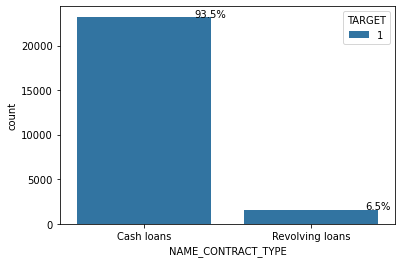

In [98]:
percent_df2(sns.countplot(data=df2, x = 'NAME_CONTRACT_TYPE',hue = 'TARGET'))
plt.show()

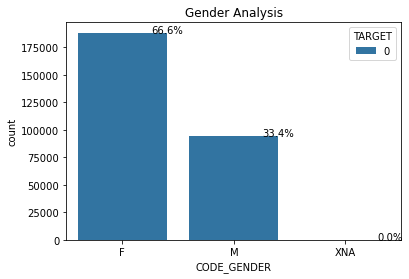

In [99]:
percent_df1(sns.countplot(data=df1, x = 'CODE_GENDER',hue = 'TARGET'))
plt.title('Gender Analysis')
plt.show()

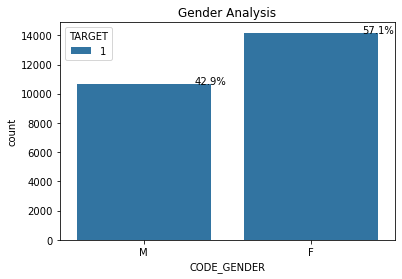

In [100]:
percent_df2(sns.countplot(data=df2, x = 'CODE_GENDER',hue = 'TARGET'))
plt.title('Gender Analysis')
plt.show()

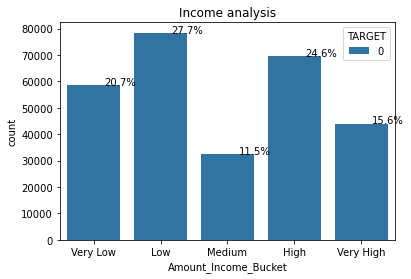

In [101]:
percent_df1(sns.countplot(data=df1, x = 'Amount_Income_Bucket',hue = 'TARGET'))
plt.title('Income analysis')
plt.show()

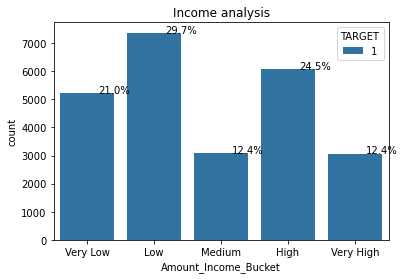

In [102]:
percent_df2(sns.countplot(data=df2, x = 'Amount_Income_Bucket',hue = 'TARGET'))
plt.title('Income analysis')
plt.show()

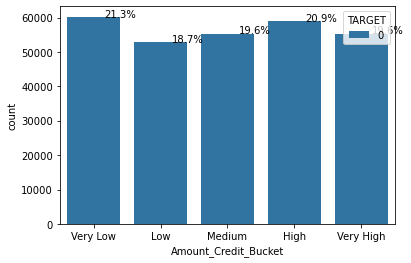

In [103]:
percent_df1(sns.countplot(data=df1, x = 'Amount_Credit_Bucket',hue = 'TARGET'))
plt.show()

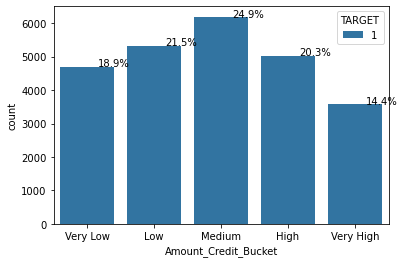

In [104]:
percent_df2(sns.countplot(data=df2, x = 'Amount_Credit_Bucket',hue = 'TARGET'))
plt.show()

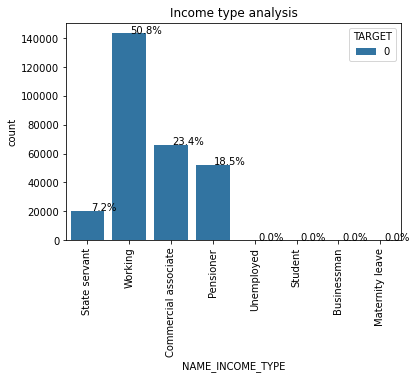

In [105]:
percent_df1(sns.countplot(data=df1, x = 'NAME_INCOME_TYPE',hue = 'TARGET'))
plt.xticks(rotation = 90)
plt.title('Income type analysis')
plt.show()

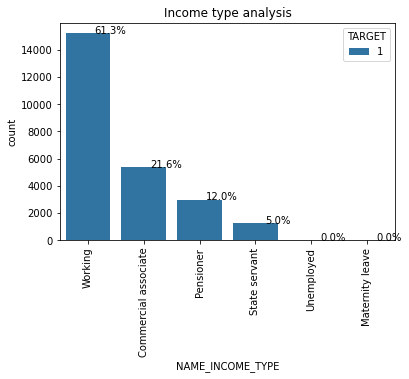

In [106]:
percent_df2(sns.countplot(data=df2, x = 'NAME_INCOME_TYPE',hue = 'TARGET'))
plt.xticks(rotation = 90)
plt.title('Income type analysis')
plt.show()

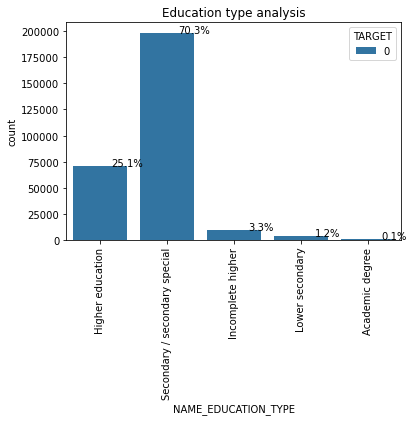

In [203]:
percent_df1(sns.countplot(data=df1, x = 'NAME_EDUCATION_TYPE',hue = 'TARGET'))
plt.title('Education type analysis')
plt.xticks(rotation = 90)
plt.show()

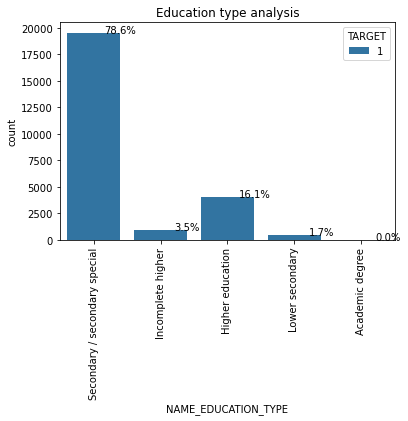

In [204]:
percent_df2(sns.countplot(data=df2, x = 'NAME_EDUCATION_TYPE',hue = 'TARGET'))
plt.title('Education type analysis')
plt.xticks(rotation = 90)
plt.show()

In [205]:
percent_df1(sns.countplot(data=df1, x = 'NAME_FAMILY_STATUS',hue = 'TARGET'))
plt.title('Family status analysis')
plt.xticks(rotation = 90)
plt.show()

In [206]:
percent_df2(sns.countplot(data=df2, x = 'NAME_FAMILY_STATUS',hue = 'TARGET'))
plt.title('Family status analysis')
plt.xticks(rotation = 90)
plt.show()

In [111]:
df1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  \
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0           Family    State servant               Higher education               Married  House / apartment                    0.003541   45.931507           1188            -1186.0             -291           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.622246      0.535276                       0.9851         0.2917                        0.9851          0.2917                        0.9851          0.2917          0.0714                  No                       1.0   
2      100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0    Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032   52.180822            225            -4260.0            -2531           1               1                1                 1           1           0        Laborers              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government      0.555912      0.729567                       0.9816         0.1667                        0.9816          0.1667                        0.9816          0.1667          0.0688                  No                       0.0   
3      100006       0         Cash loans           F            N               Y             0          135000.0    312682.5      29686.5         297000.0    Unaccompanied          Working  Secondary / secondary special        Civil marriage  House / apartment                    0.008019   52.068493           3039            -9833.0            -2437           1               1                0                 1           0           0        Laborers              2.0                     2                            2                  WEDNESDAY                       17                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.650442      0.535276                       0.9816         0.1667                        0.9816          0.1667                        0.9816          0.1667          0.0688                  No                       2.0   
4      100007       0         Cash loans           M   

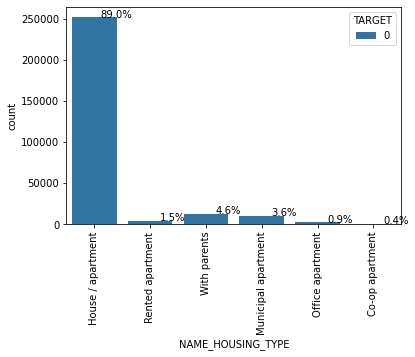

In [112]:
percent_df1(sns.countplot(data=df1, x = 'NAME_HOUSING_TYPE',hue = 'TARGET'))
plt.xticks(rotation = 90)
plt.show()

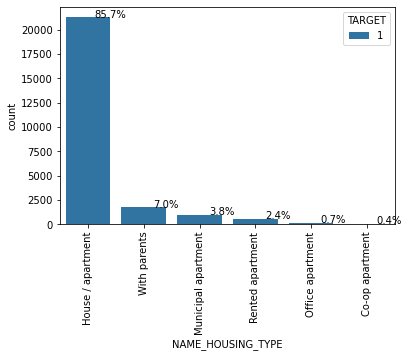

In [113]:
percent_df2(sns.countplot(data=df2, x = 'NAME_HOUSING_TYPE',hue = 'TARGET'))
plt.xticks(rotation = 90)
plt.show()

In [114]:
plt.figure(figsize=[10,6])
percent_df1(sns.countplot(data=df1, x = 'OCCUPATION_TYPE',hue = 'TARGET'))
plt.xticks(rotation = 90)
plt.show()

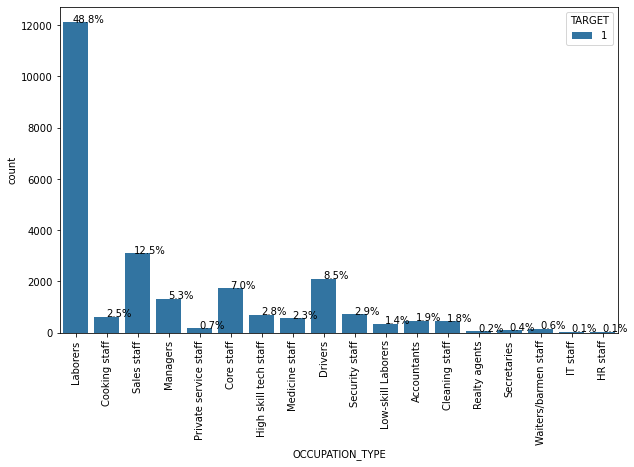

In [115]:
plt.figure(figsize=[10,6])
percent_df2(sns.countplot(data=df2, x = 'OCCUPATION_TYPE',hue = 'TARGET'))
plt.xticks(rotation = 90)
plt.show()

In [116]:
plt.figure(figsize=[30,6])
percent_df1(sns.countplot(data=df1, x = 'ORGANIZATION_TYPE',hue = 'TARGET'))
plt.xticks(rotation = 90)
plt.show()

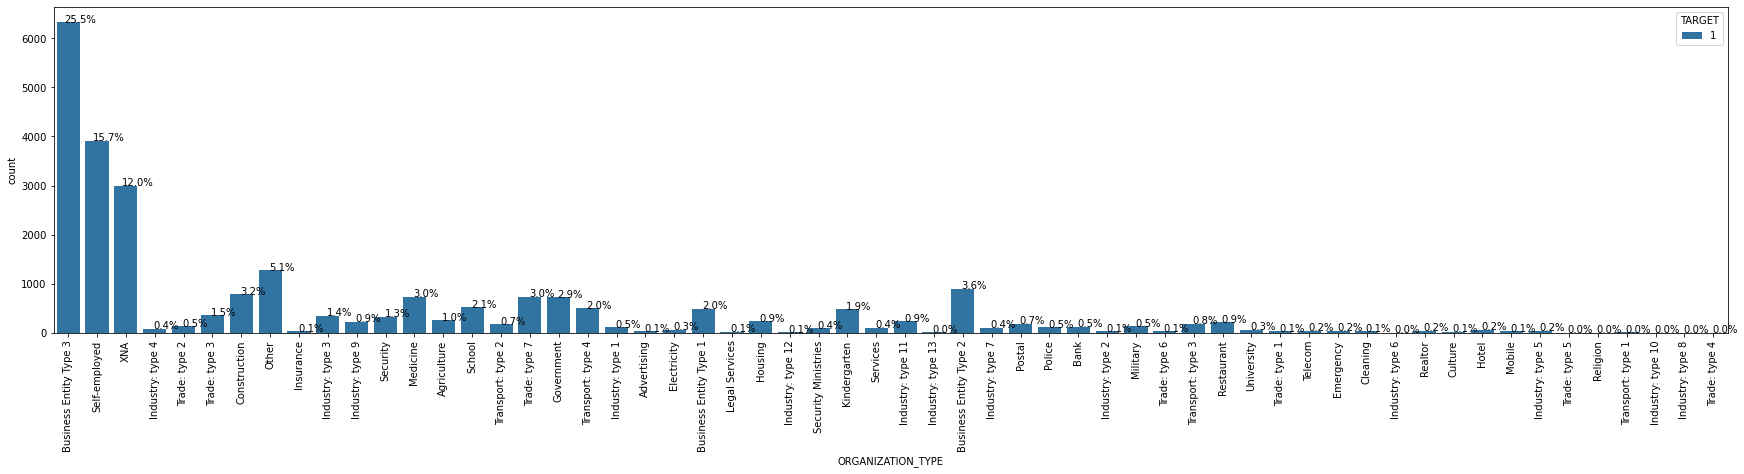

In [117]:
plt.figure(figsize=[30,6])
percent_df2(sns.countplot(data=df2, x = 'ORGANIZATION_TYPE',hue = 'TARGET'))
plt.xticks(rotation = 90)
plt.show()

C:\Users\malin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


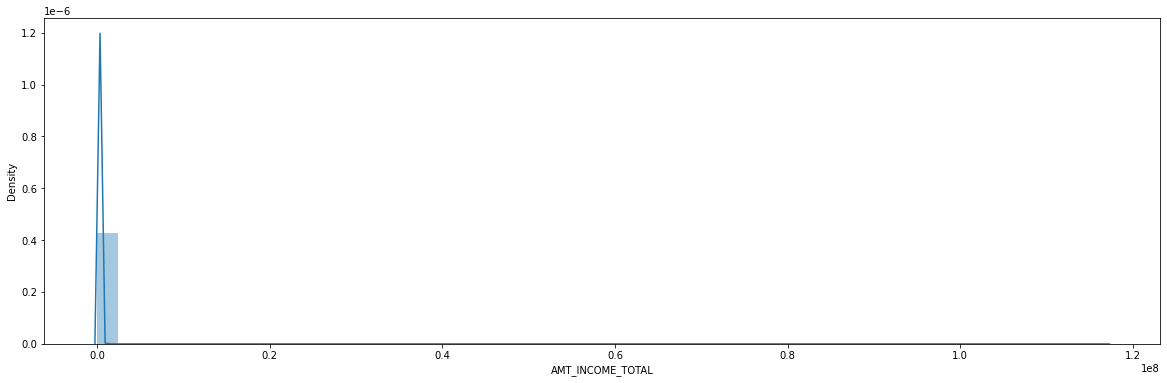

In [118]:
plt.figure(figsize=[20,6])
sns.distplot(df2['AMT_INCOME_TOTAL'])
plt.show()

C:\Users\malin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


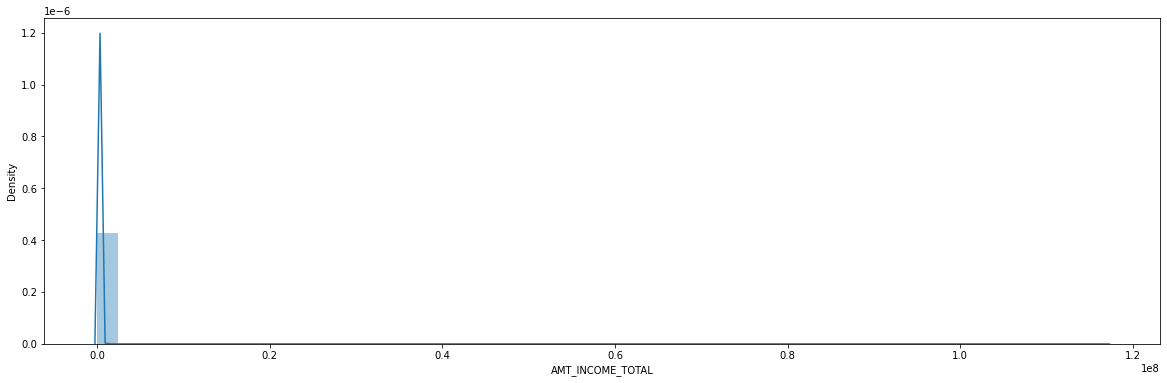

In [119]:
plt.figure(figsize=[20,6])
sns.distplot(df2['AMT_INCOME_TOTAL'])
plt.show()

In [120]:
plt.figure(figsize=[20,6])
sns.distplot(df1['AMT_CREDIT'])
plt.show()

C:\Users\malin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


C:\Users\malin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


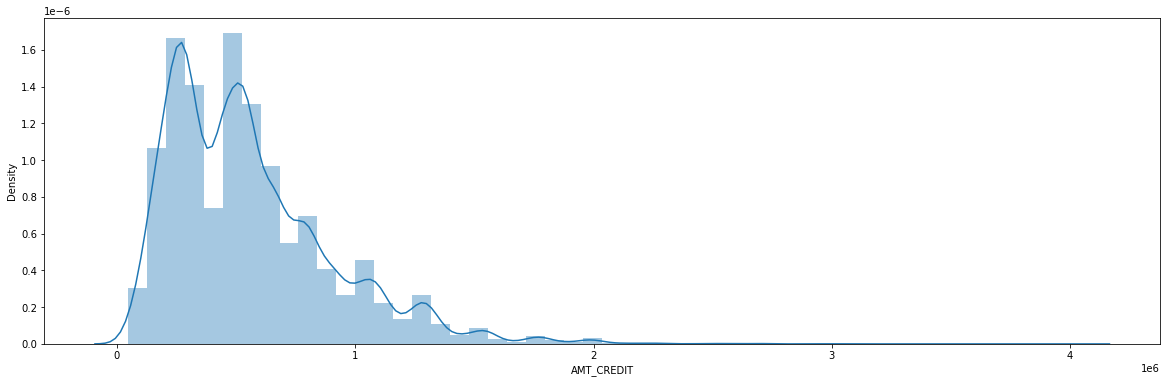

In [121]:
plt.figure(figsize=[20,6])
sns.distplot(df2['AMT_CREDIT'])
plt.show()

In [122]:
plt.figure(figsize=[20,6])
sns.distplot(df1['AMT_ANNUITY'])
plt.show()

C:\Users\malin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


C:\Users\malin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


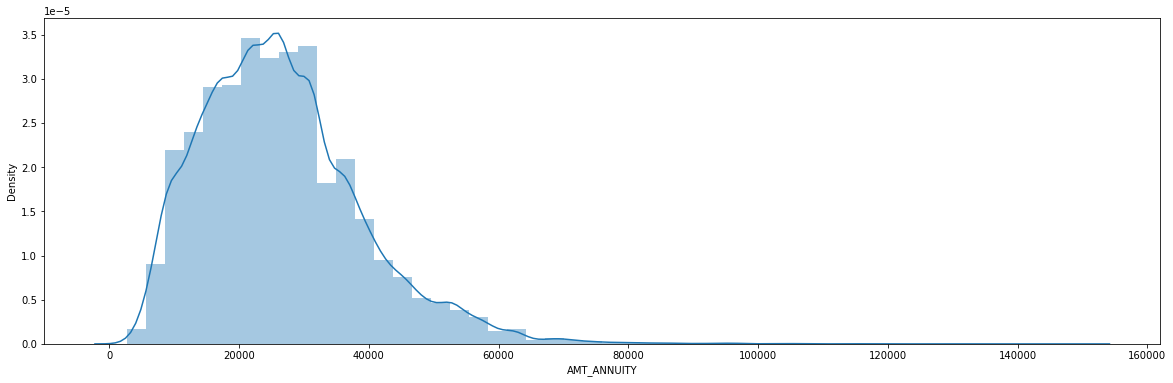

In [123]:
plt.figure(figsize=[20,6])
sns.distplot(df2['AMT_ANNUITY'])
plt.show()

C:\Users\malin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


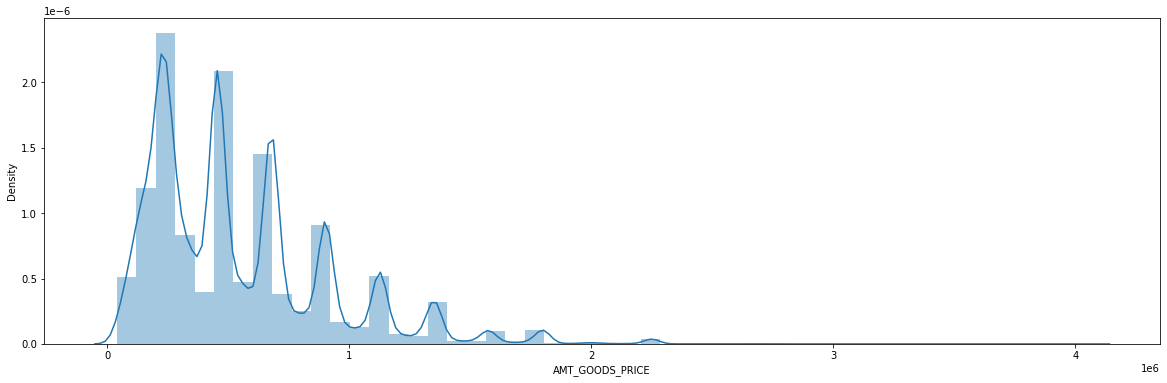

In [124]:
plt.figure(figsize=[20,6])
sns.distplot(df1['AMT_GOODS_PRICE'])
plt.show()

C:\Users\malin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


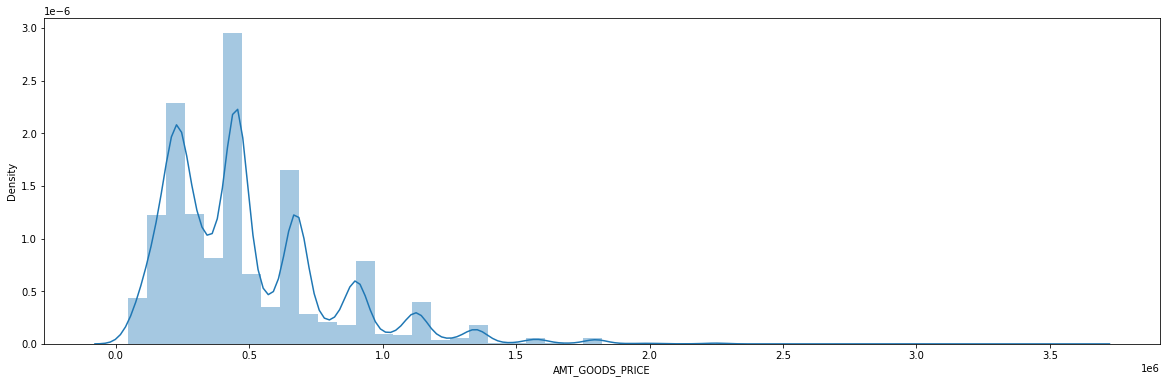

In [125]:
plt.figure(figsize=[20,6])
sns.distplot(df2['AMT_GOODS_PRICE'])
plt.show()

C:\Users\malin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


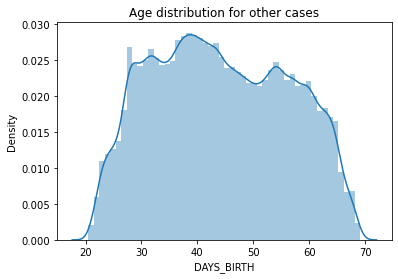

In [201]:
# plt.figure(figsize=[20,6])
sns.distplot(df1['DAYS_BIRTH'])
plt.title('Age distribution for other cases')
plt.show()

C:\Users\malin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


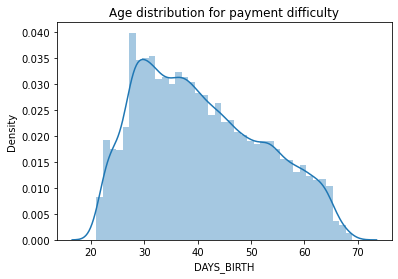

In [202]:
# plt.figure(figsize=[20,6])
sns.distplot(df2['DAYS_BIRTH'])
plt.title('Age distribution for payment difficulty')
plt.show()

C:\Users\malin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


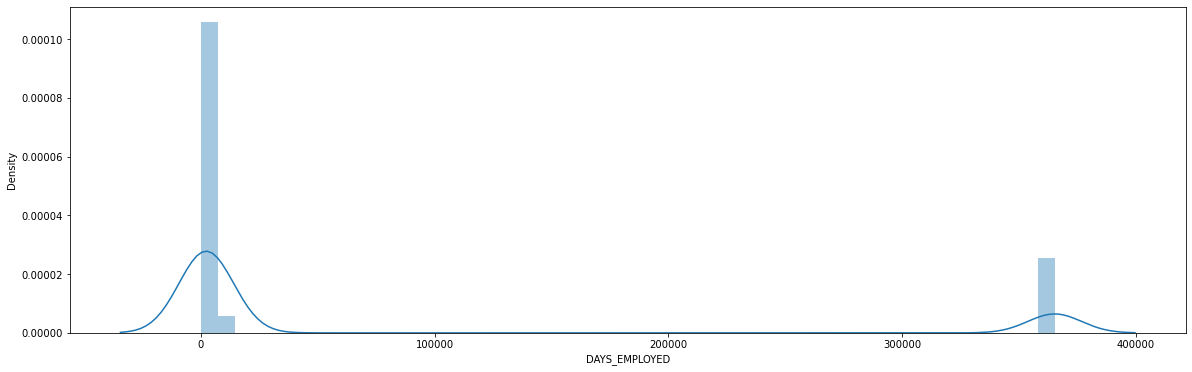

In [128]:
plt.figure(figsize=[20,6])
sns.distplot(df1['DAYS_EMPLOYED'])
plt.show()

C:\Users\malin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


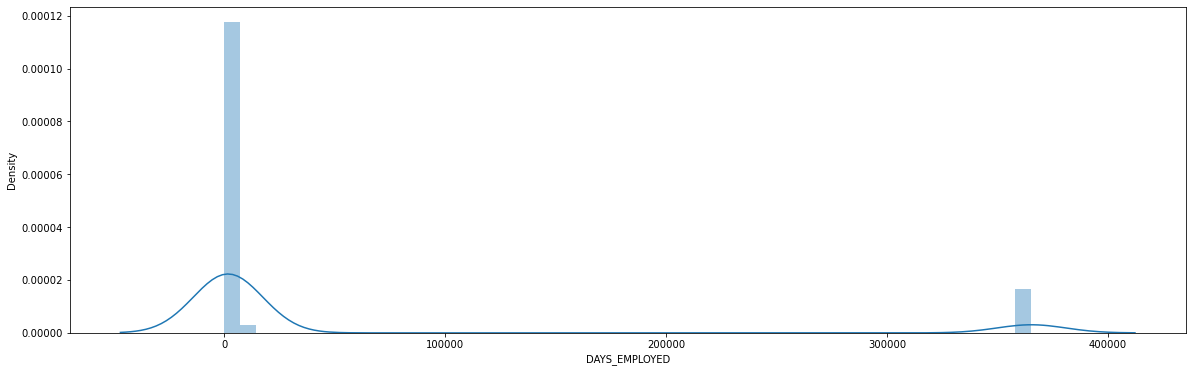

In [129]:
plt.figure(figsize=[20,6])
sns.distplot(df2['DAYS_EMPLOYED'])
plt.show()

# Previous application data set analysis

### Meta data check

In [130]:
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0               0.0          17145.0                   SATURDAY                       15                           Y                       1                0.0               0.182832                  0.867336                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0               NaN         607500.0                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5               NaN         112500.0                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0               NaN         450000.0                     MONDAY                        7                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0               NaN         337500.0                   THURSDAY                        9                           Y                       1                NaN                    NaN                       NaN                Repairs              Refused           -781  Cash through the bank   

In [131]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [132]:
previous_application.shape

(1670214, 37)

In [133]:
previous_application.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [134]:
percent_missing = previous_application.isnull().sum() * 100 / len(previous_application)
missing_value_df = pd.DataFrame({'missing_no': previous_application.isnull().sum(),
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending = False)
missing_value_df

missing_no  percent_missing
RATE_INTEREST_PRIVILEGED        1664263        99.643698
RATE_INTEREST_PRIMARY           1664263        99.643698
AMT_DOWN_PAYMENT                 895844        53.636480
RATE_DOWN_PAYMENT                895844        53.636480
NAME_TYPE_SUITE                  820405        49.119754
NFLAG_INSURED_ON_APPROVAL        673065        40.298129
DAYS_TERMINATION                 673065        40.298129
DAYS_LAST_DUE                    673065        40.298129
DAYS_LAST_DUE_1ST_VERSION        673065        40.298129
DAYS_FIRST_DUE                   673065        40.298129
DAYS_FIRST_DRAWING               673065        40.298129
AMT_GOODS_PRICE                  385515        23.081773
AMT_ANNUITY                      372235        22.286665
CNT_PAYMENT                      372230        22.286366
PRODUCT_COMBINATION                 346         0.020716
AMT_CREDIT                            1         0.000060
NAME_YIELD_GROUP                      0         0.000000
NAME_PORTFOLIO                        0         0.000000
NAME_SELLER_INDUSTRY                  0         0.000000
SELLERPLACE_AREA                      0         0.000000
CHANNEL_TYPE                          0         0.000000
NAME_PRODUCT_TYPE                     0         0.000000
SK_ID_PREV                            0         0.000000
NAME_GOODS_CATEGORY                   0         0.000000
NAME_CLIENT_TYPE                      0         0.000000
CODE_REJECT_REASON                    0         0.000000
SK_ID_CURR                            0         0.000000
DAYS_DECISION                         0         0.000000
NAME_CONTRACT_STATUS                  0         0.000000
NAME_CASH_LOAN_PURPOSE                0         0.000000
NFLAG_LAST_APPL_IN_DAY                0         0.000000
FLAG_LAST_APPL_PER_CONTRACT           0         0.000000
HOUR_APPR_PROCESS_START               0         0.000000
WEEKDAY_APPR_PROCESS_START            0         0.000000
AMT_APPLICATION                       0         0.000000
NAME_CONTRACT_TYPE                    0         0.000000
NAME_PAYMENT_TYPE                     0         0.000000

In [135]:
perc = 50.0
min_count =  int(((100-perc)/100)*previous_application.shape[0] + 1)
previous_application = previous_application.dropna( axis=1, 
                thresh=min_count)

In [136]:
percent_missing = previous_application.isnull().sum() * 100 / len(previous_application)
missing_value_df = pd.DataFrame({'missing_no': previous_application.isnull().sum(),
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending = False)
missing_value_df

missing_no  percent_missing
NAME_TYPE_SUITE                  820405        49.119754
DAYS_FIRST_DRAWING               673065        40.298129
DAYS_TERMINATION                 673065        40.298129
DAYS_LAST_DUE                    673065        40.298129
DAYS_LAST_DUE_1ST_VERSION        673065        40.298129
DAYS_FIRST_DUE                   673065        40.298129
NFLAG_INSURED_ON_APPROVAL        673065        40.298129
AMT_GOODS_PRICE                  385515        23.081773
AMT_ANNUITY                      372235        22.286665
CNT_PAYMENT                      372230        22.286366
PRODUCT_COMBINATION                 346         0.020716
AMT_CREDIT                            1         0.000060
WEEKDAY_APPR_PROCESS_START            0         0.000000
HOUR_APPR_PROCESS_START               0         0.000000
NAME_CONTRACT_TYPE                    0         0.000000
AMT_APPLICATION                       0         0.000000
NAME_YIELD_GROUP                      0         0.000000
NAME_SELLER_INDUSTRY                  0         0.000000
SELLERPLACE_AREA                      0         0.000000
CHANNEL_TYPE                          0         0.000000
NAME_PRODUCT_TYPE                     0         0.000000
NAME_PORTFOLIO                        0         0.000000
NAME_GOODS_CATEGORY                   0         0.000000
NAME_CLIENT_TYPE                      0         0.000000
SK_ID_CURR                            0         0.000000
CODE_REJECT_REASON                    0         0.000000
NAME_PAYMENT_TYPE                     0         0.000000
DAYS_DECISION                         0         0.000000
NAME_CONTRACT_STATUS                  0         0.000000
NAME_CASH_LOAN_PURPOSE                0         0.000000
NFLAG_LAST_APPL_IN_DAY                0         0.000000
FLAG_LAST_APPL_PER_CONTRACT           0         0.000000
SK_ID_PREV                            0         0.000000

In [137]:
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0          17145.0                   SATURDAY                       15                           Y                       1                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0         607500.0                   THURSDAY                       11                           Y                       1                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5         112500.0                    TUESDAY                       11                           Y                       1                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0         450000.0                     MONDAY                        7                           Y                       1                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0         337500.0                   THURSDAY                        9                           Y                       1                Repairs              Refused           -781  Cash through the bank                 HC              NaN         Repeater                 XNA           Cash           walk-in  Credit and cash offices                -1                  XNA         24.0             high         Cash Street: high                 NaN             NaN                        NaN            NaN               NaN                        NaN

In [138]:
numeric = previous_application._get_numeric_data().columns
numeric_list_p = list(numeric)
numeric_list_p

['SK_ID_PREV',
 'SK_ID_CURR',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [139]:
for x in numeric_list_p:
    previous_application[x].fillna(previous_application[x].median(), inplace = True)

In [140]:
categorical_list_p = list(set(previous_application.columns) - set(numeric))
categorical_list_p

['NAME_GOODS_CATEGORY',
 'NAME_CLIENT_TYPE',
 'NAME_PRODUCT_TYPE',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_PAYMENT_TYPE',
 'PRODUCT_COMBINATION',
 'CHANNEL_TYPE',
 'NAME_CONTRACT_TYPE',
 'NAME_CONTRACT_STATUS',
 'NAME_TYPE_SUITE',
 'NAME_PORTFOLIO',
 'NAME_SELLER_INDUSTRY',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_YIELD_GROUP',
 'CODE_REJECT_REASON']

In [141]:
for x in categorical_list_p:
    previous_application[x].fillna(previous_application[x].mode()[0], inplace = True)

In [142]:
previous_application.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_TYPE_SUITE                0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
DAYS_FIRST_DRAWING             0
DAYS_FIRST_DUE                 0
DAYS_LAST_DUE_1ST_VERSION      0
DAYS_LAST_

#### Some important columns in previous_application data set are NAME_CONTRACT_TYPE, AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, NAME_CONTRACT_STATUS, NAME_PAYMENT_TYPE, NAME_CLIENT_TYPE, WEEKDAY_APPR_PROCESS_START, CODE_REJECT_REASON

C:\Users\malin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


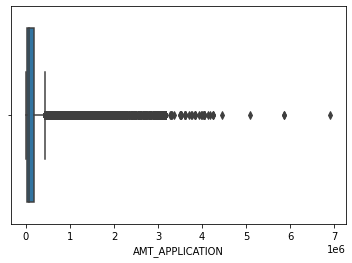

In [143]:
sns.boxplot(previous_application['AMT_APPLICATION'])
plt.show()

C:\Users\malin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


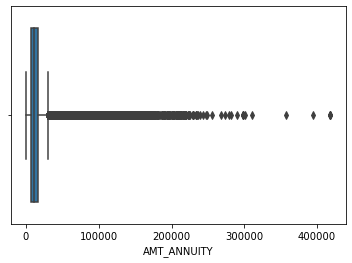

In [144]:
sns.boxplot(previous_application['AMT_ANNUITY'])
plt.show()

C:\Users\malin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


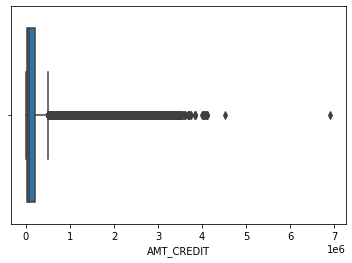

In [145]:
sns.boxplot(previous_application['AMT_CREDIT'])
plt.show()

### Univariate analysis

In [146]:
def percentage_previousapp(ax):
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/float(len(previous_application)))
            x = p.get_x() + p.get_width()
            y = p.get_height()
            ax.annotate(percentage, (x, y),ha='center')

C:\Users\malin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


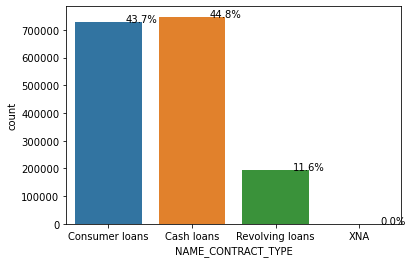

In [147]:
percentage_previousapp(sns.countplot(previous_application.NAME_CONTRACT_TYPE))
plt.show()

In [148]:
previous_application.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'], dtype='object')

C:\Users\malin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


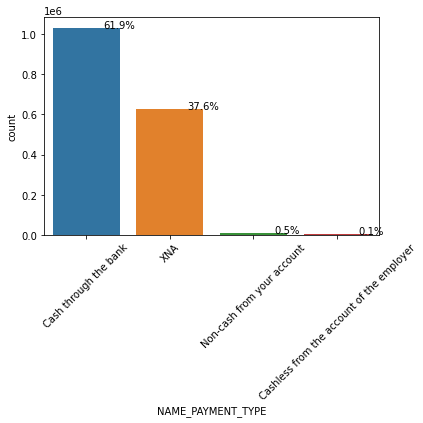

In [149]:
percentage_previousapp(sns.countplot(previous_application.NAME_PAYMENT_TYPE))
plt.xticks(rotation=45)
plt.show()

C:\Users\malin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


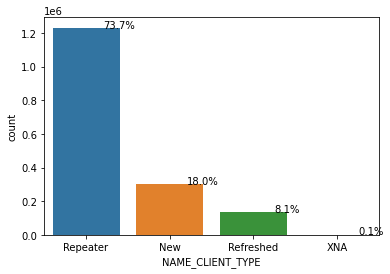

In [150]:
percentage_previousapp(sns.countplot(previous_application.NAME_CLIENT_TYPE))
plt.show()

C:\Users\malin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


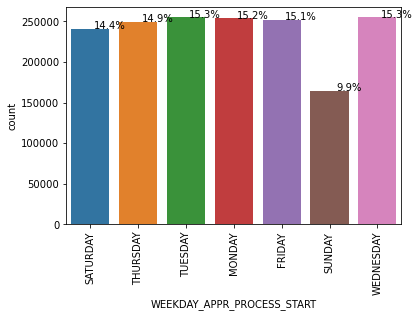

In [151]:
percentage_previousapp(sns.countplot(previous_application.WEEKDAY_APPR_PROCESS_START))
plt.xticks(rotation = 90)
plt.show()

C:\Users\malin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


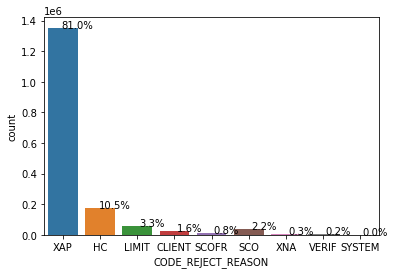

In [152]:
percentage_previousapp(sns.countplot(previous_application.CODE_REJECT_REASON))
plt.show()

C:\Users\malin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


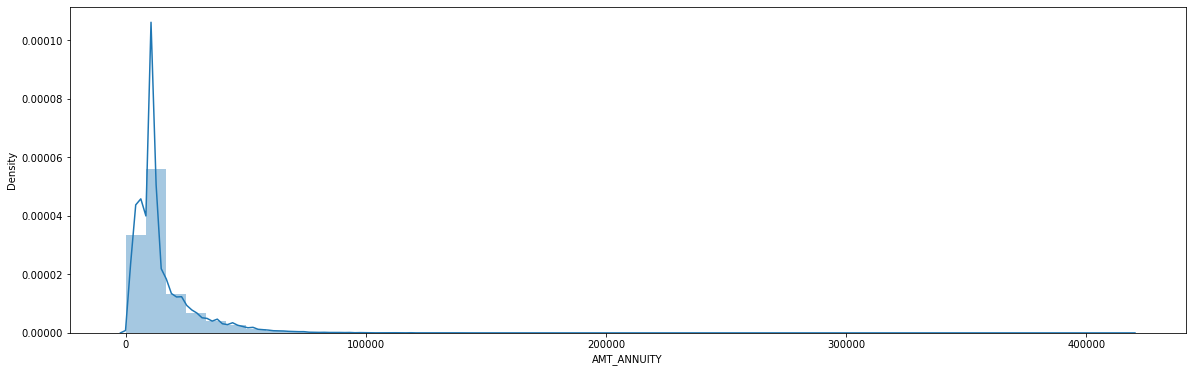

In [153]:
plt.figure(figsize=[20,6])
sns.distplot(previous_application['AMT_ANNUITY'])
plt.show()

In [154]:
plt.figure(figsize=[20,6])
sns.distplot(previous_application['AMT_APPLICATION'])
plt.show()

C:\Users\malin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [155]:
plt.figure(figsize=[20,6])
sns.distplot(previous_application['AMT_CREDIT'])
plt.show()

C:\Users\malin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


## Bivariate analysis

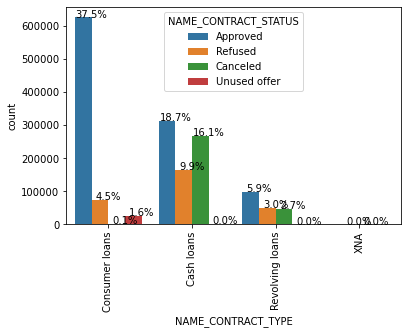

In [156]:
percentage_previousapp(sns.countplot(data=previous_application, x = 'NAME_CONTRACT_TYPE',hue = 'NAME_CONTRACT_STATUS'))
plt.xticks(rotation=90)
plt.show()

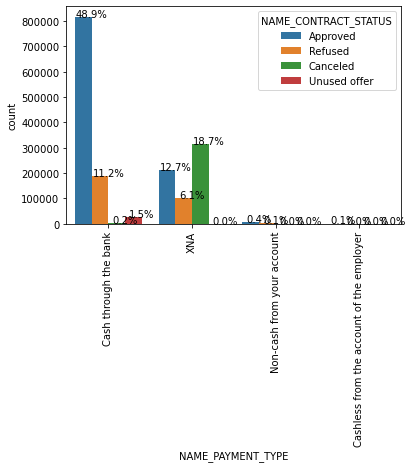

In [157]:
percentage_previousapp(sns.countplot(data=previous_application, x = 'NAME_PAYMENT_TYPE',hue = 'NAME_CONTRACT_STATUS'))
plt.xticks(rotation=90)
plt.show()

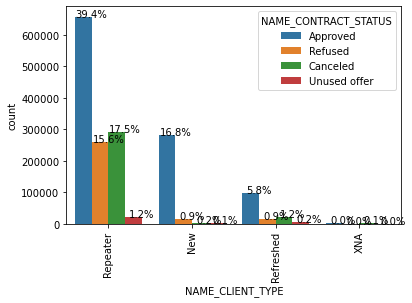

In [158]:
percentage_previousapp(sns.countplot(data=previous_application, x = 'NAME_CLIENT_TYPE',hue = 'NAME_CONTRACT_STATUS'))
plt.xticks(rotation=90)
plt.show()

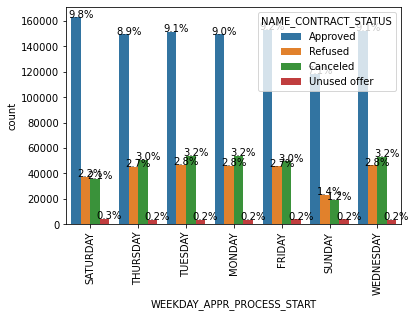

In [159]:
percentage_previousapp(sns.countplot(data=previous_application, x = 'WEEKDAY_APPR_PROCESS_START',hue = 'NAME_CONTRACT_STATUS'))
plt.xticks(rotation=90)
plt.show()

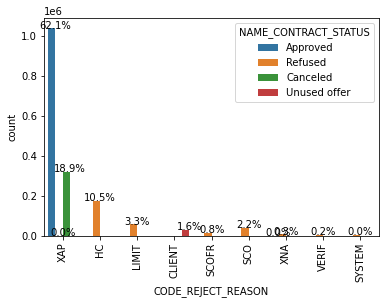

In [160]:
percentage_previousapp(sns.countplot(data=previous_application, x = 'CODE_REJECT_REASON',hue = 'NAME_CONTRACT_STATUS'))
plt.xticks(rotation=90)
plt.show()

C:\Users\malin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


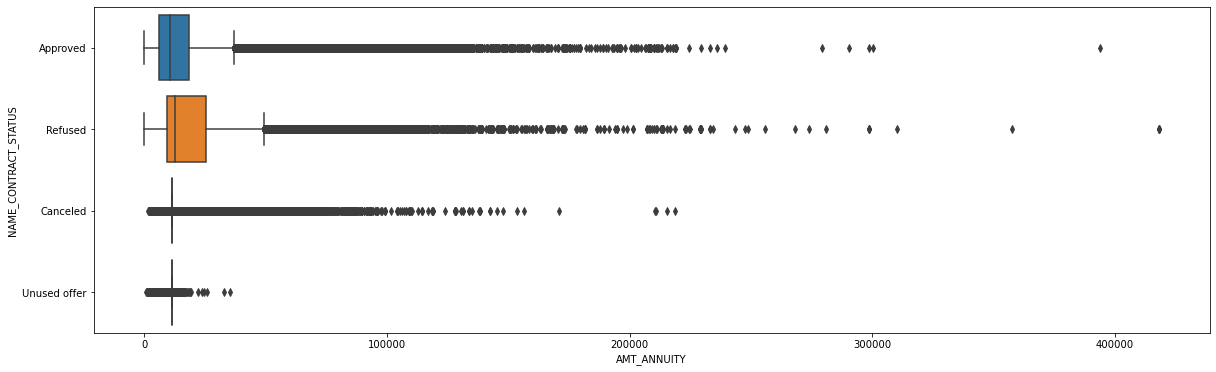

In [161]:
plt.figure(figsize=[20,6])
sns.boxplot(previous_application['AMT_ANNUITY'], previous_application['NAME_CONTRACT_STATUS'])
plt.show()

C:\Users\malin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


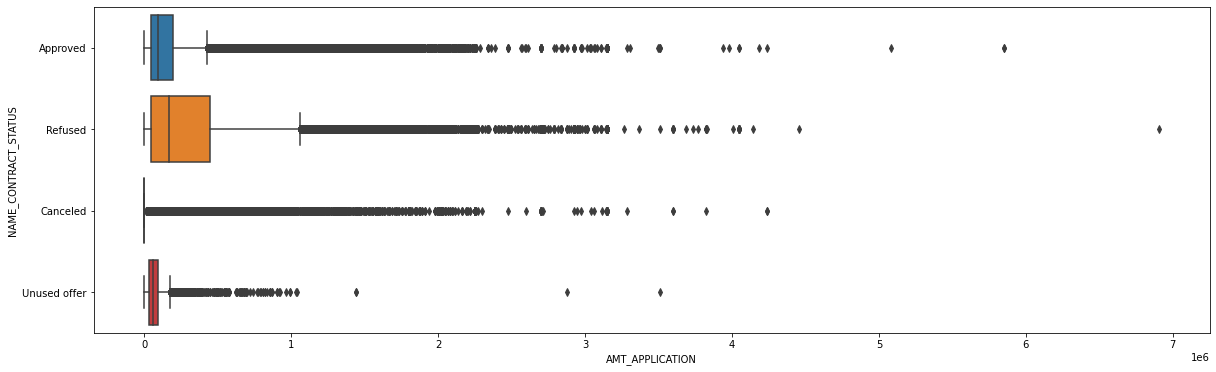

In [162]:
plt.figure(figsize=[20,6])
sns.boxplot(previous_application['AMT_APPLICATION'], previous_application['NAME_CONTRACT_STATUS'])
plt.show()

C:\Users\malin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


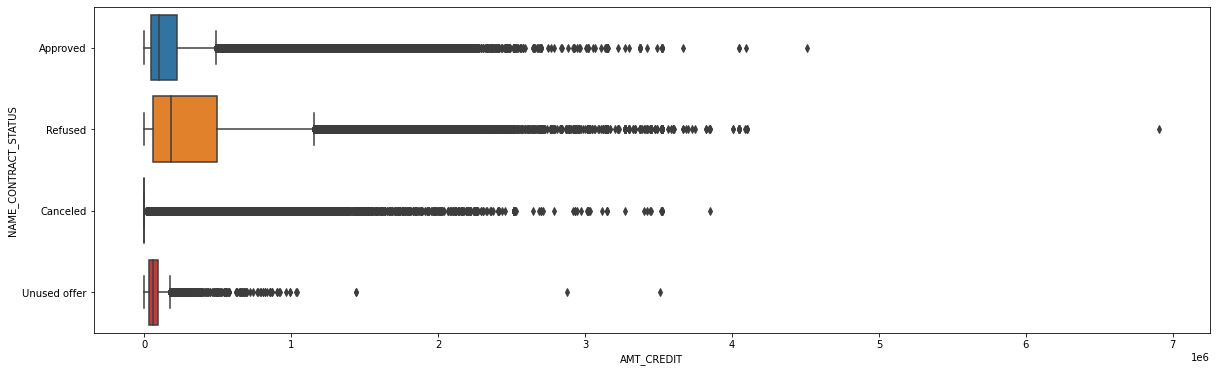

In [163]:
plt.figure(figsize=[20,6])
sns.boxplot(previous_application['AMT_CREDIT'], previous_application['NAME_CONTRACT_STATUS'])
plt.show()

# Merge data

In [164]:
merged_data = application_data.merge(previous_application, left_on = 'SK_ID_CURR', right_on = 'SK_ID_CURR', how = 'inner')
merged_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  \
0      100002       1           Cash loans           M            N               Y             0          202500.0      406597.5        24700.5           351000.0     Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801   25.920548            637            -3648.0            -2120           1               1                0                 1           1           0        Laborers              1.0                     2                            2                    WEDNESDAY                         10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.262949      0.139376                       0.9722         0.0833                        0.9722          0.0833                        0.9722          0.0833          0.0149                  No                       2.0   
1      100003       0           Cash loans           F            N               N             0          270000.0     1293502.5        35698.5          1129500.0            Family    State servant               Higher education               Married  House / apartment                    0.003541   45.931507           1188            -1186.0             -291           1               1                0                 1           1           0      Core staff              2.0                     1                            1                       MONDAY                         11                           0                           0                            0                       0                       0                        0                  School      0.622246      0.535276                       0.9851         0.2917                        0.9851          0.2917                        0.9851          0.2917          0.0714                  No                       1.0   
2      100003       0           Cash loans           F            N               N             0          270000.0     1293502.5        35698.5          1129500.0            Family    State servant               Higher education               Married  House / apartment                    0.003541   45.931507           1188            -1186.0             -291           1               1                0                 1           1           0      Core staff              2.0                     1                            1                       MONDAY                         11                           0                           0                            0                       0                       0                        0                  School      0.622246      0.535276                       0.9851         0.2917                        0.9851          0.2917                        0.9851          0.2917          0.0714                  No                       1.0   
3  

In [165]:
merged_data.shape

(1413701, 116)

In [166]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Columns: 116 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: category(3), float64(39), int64(45), object(29)
memory usage: 1.2+ GB


In [167]:
merged_data.describe()

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE    FLAG_PHONE    FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  \
count  1.413701e+06  1.413701e+06  1.413701e+06      1.413701e+06  1.413701e+06   1.413701e+06       1.413701e+06                1.413701e+06  1.413701e+06   1.413701e+06       1.413701e+06     1.413701e+06   1413701.0    1.413701e+06     1.413701e+06      1.413701e+06  1.413701e+06  1.413701e+06     1.413701e+06          1.413701e+06                 1.413701e+06               1.413701e+06                1.413701e+06                1.413701e+06                 1.413701e+06            1.413701e+06            1.413701e+06             1.413701e+06  1.413701e+06  1.413701e+06                 1.413701e+06   1.413701e+06                  1.413701e+06    1.413701e+06                  1.413701e+06    1.413701e+06    1.413701e+06              1.413701e+06              1.413701e+06              1.413701e+06              1.413701e+06            1.413701e+06     1.413701e+06     1.413701e+06     1.413701e+06     1.413701e+06     1.413701e+06     1.413701e+06     1.413701e+06     1.413701e+06   
mean   2.784813e+05  8.655296e-02  4.048933e-01      1.733160e+05  5.875537e+05   2.701688e+04       5.276522e+05                2.074985e-02  4.471521e+01   7.266347e+04      -5.003233e+03    -3.034563e+03         1.0    8.064393e-01     1.822585e-01      9.992452e-01  2.828752e-01  7.242904e-02     2.150501e+00          2.059638e+00                 2.037603e+00               1.198433e+01                1.207327e-02                4.396686e-02                 3.604793e-02            7.360538e-02            2.221481e-01             1.740601e-01  5.114978e-01  4.974956e-01                 9.793491e-01   1.948367e-01                  9.789780e-01    1.929338e-01                  9.793411e-01    1.946486e-01    8.500600e-02              1.540740e+00              1.537008e-01              1.522906e+00              1.078021e-01           -1.084701e+03     7.073632e-05     7.385600e-01     7.639522e-05     1.369597e-02     8.942273e-02     2.129163e-04     7.442521e-02     3.182427e-03   
std    1.028118e+05  2.811789e-01  7.173454e-01      1.985734e+05  3.849173e+05   1.395072e+04       3.531028e+05                1.334702e-02  1.190290e+01   1.433374e+05       3.551051e+03     1.507376e+03         0.0    3.950887e-01     3.860576e-01      2.746247e-02  4.503965e-01  2.591971e-01     9.006787e-01          4.957797e-01                 4.886431e-01               3.232181e+00                1.092132e-01                2.050215e-01                 1.864095e-01            2.611277e-01            4.156903e-01             3.791613e-01  1.910056e-01  1.797586e-01                 4.432303e-02   1.040334e-01                  4.845692e-02    1.030828e-01                  4.499840e-02    1.043215e-01    7.656257e-02              2.528944e+00              4.654353e-01              2.507192e+00              3.786711e-01            7.999369e+02     8.410194e-03     4.394192e-01     8.740105e-03     1.162256e-01     2.853530e-01     1.459010e-02     2.624617e-01     5.632319e-02   
min    1.000020e+

In [168]:
percent_missing_merged = merged_data.isnull().sum() * 100 / len(merged_data)
missing_value_df = pd.DataFrame({'missing_no': merged_data.isnull().sum(),
                                 'percent_missing': percent_missing_merged})
missing_value_df.sort_values('percent_missing', inplace=True, ascending = False)
missing_value_df

missing_no  percent_missing
SK_ID_CURR                             0              0.0
FLAG_DOCUMENT_20                       0              0.0
NAME_CONTRACT_TYPE_y                   0              0.0
SK_ID_PREV                             0              0.0
Age_bucket                             0              0.0
Amount_Credit_Bucket                   0              0.0
Amount_Income_Bucket                   0              0.0
AMT_REQ_CREDIT_BUREAU_YEAR             0              0.0
AMT_REQ_CREDIT_BUREAU_QRT              0              0.0
AMT_REQ_CREDIT_BUREAU_MON              0              0.0
AMT_REQ_CREDIT_BUREAU_WEEK             0              0.0
AMT_REQ_CREDIT_BUREAU_DAY              0              0.0
AMT_REQ_CREDIT_BUREAU_HOUR             0              0.0
FLAG_DOCUMENT_21                       0              0.0
FLAG_DOCUMENT_19                       0              0.0
TARGET                                 0              0.0
FLAG_DOCUMENT_18                       0              0.0
FLAG_DOCUMENT_17                       0              0.0
FLAG_DOCUMENT_16                       0              0.0
FLAG_DOCUMENT_15                       0              0.0
FLAG_DOCUMENT_14                       0              0.0
FLAG_DOCUMENT_13                       0              0.0
FLAG_DOCUMENT_12                       0              0.0
FLAG_DOCUMENT_11                       0              0.0
FLAG_DOCUMENT_10                       0              0.0
FLAG_DOCUMENT_9                        0              0.0
FLAG_DOCUMENT_8                        0              0.0
FLAG_DOCUMENT_7                        0              0.0
AMT_ANNUITY_y                          0              0.0
AMT_APPLICATION                        0              0.0
AMT_CREDIT_y                           0              0.0
AMT_GOODS_PRICE_y                      0              0.0
DAYS_TERMINATION                       0              0.0
DAYS_LAST_DUE                          0              0.0
DAYS_LAST_DUE_1ST_VERSION              0              0.0
DAYS_FIRST_DUE                         0              0.0
DAYS_FIRST_DRAWING                     0              0.0
PRODUCT_COMBINATION                    0              0.0
NAME_YIELD_GROUP                       0              0.0
CNT_PAYMENT                            0              0.0
NAME_SELLER_INDUSTRY                   0              0.0
SELLERPLACE_AREA                       0              0.0
CHANNEL_TYPE                           0              0.0
NAME_PRODUCT_TYPE                      0              0.0
NAME_PORTFOLIO                         0              0.0
NAME_GOODS_CATEGORY                    0              0.0
NAME_CLIENT_TYPE                       0              0.0
NAME_TYPE_SUITE_y                      0              0.0
CODE_REJECT_REASON                     0              0.0
NAME_PAYMENT_TYPE                      0              0.0
DAYS_DECISION                          0              0.0
NAME_CONTRACT_STATUS                   0              0.0
NAME_CASH_LOAN_PURPOSE                 0              0.0
NFLAG_LAST_APPL_IN_DAY                 0              0.0
FLAG_LAST_APPL_PER_CONTRACT            0              0.0
HOUR_APPR_PROCESS_START_y              0              0.0
WEEKDAY_APPR_PROCESS_START_y           0              0.0
FLAG_DOCUMENT_6                        0              0.0
FLAG_DOCUMENT_5                        0              0.0
FLAG_DOCUMENT_4                        0              0.0
CNT_FAM_MEMBERS                        0              0.0
FLAG_EMAIL                             0              0.0
FLAG_PHONE                             0              0.0
FLAG_CONT_MOBILE                       0              0.0
FLAG_WORK_PHONE                        0              0.0
FLAG_EMP_PHONE                         0              0.0
FLAG_MOBIL                             0              0.0
DAYS_ID_PUBLISH                        0              0.0
DAYS_REGISTRATION           

In [169]:
merged_data.shape

(1413701, 116)

In [170]:
numeric = merged_data._get_numeric_data().columns
numeric_list = list(numeric)

In [171]:
for x in numeric_list:
    merged_data[x].fillna(merged_data[x].median(), inplace = True)

In [172]:
categorical_list = list(set(merged_data.columns) - set(numeric))
categorical_list

['NAME_CLIENT_TYPE',
 'NAME_CONTRACT_TYPE_y',
 'NAME_INCOME_TYPE',
 'NAME_HOUSING_TYPE',
 'FLAG_OWN_REALTY',
 'Amount_Income_Bucket',
 'CODE_REJECT_REASON',
 'NAME_GOODS_CATEGORY',
 'NAME_TYPE_SUITE_x',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_EDUCATION_TYPE',
 'NAME_PAYMENT_TYPE',
 'CHANNEL_TYPE',
 'WEEKDAY_APPR_PROCESS_START_y',
 'OCCUPATION_TYPE',
 'Age_bucket',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_FAMILY_STATUS',
 'Amount_Credit_Bucket',
 'ORGANIZATION_TYPE',
 'PRODUCT_COMBINATION',
 'FLAG_OWN_CAR',
 'NAME_CONTRACT_STATUS',
 'WEEKDAY_APPR_PROCESS_START_x',
 'NAME_PORTFOLIO',
 'NAME_SELLER_INDUSTRY',
 'NAME_CONTRACT_TYPE_x',
 'CODE_GENDER',
 'NAME_PRODUCT_TYPE',
 'EMERGENCYSTATE_MODE',
 'NAME_TYPE_SUITE_y',
 'NAME_YIELD_GROUP']

In [173]:
for x in categorical_list:
    merged_data[x].fillna(merged_data[x].mode()[0], inplace = True)

In [174]:
merged_data.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE_x            0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT_x                    0
AMT_ANNUITY_x                   0
AMT_GOODS_PRICE_x               0
NAME_TYPE_SUITE_x               0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_

In [175]:
def percentage_merge(ax):
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/float(len(merged_data)))
            x = p.get_x() + p.get_width()
            y = p.get_height()
            ax.annotate(percentage, (x, y),ha='center')

Text(0.5, 1.0, 'Contract status with target')

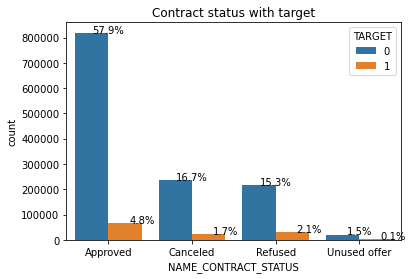

In [176]:
percentage_merge(sns.countplot(x='NAME_CONTRACT_STATUS', hue = 'TARGET', data = merged_data))
plt.title('Contract status with target')

Text(0.5, 1.0, 'Contract status with target')

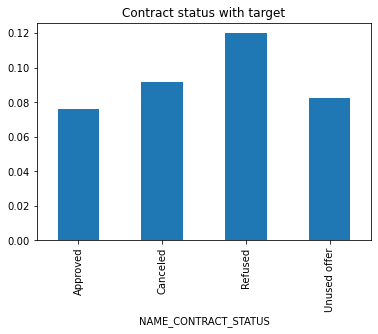

In [177]:
merged_data.groupby(['NAME_CONTRACT_STATUS'])['TARGET'].mean().plot.bar()
plt.title('Contract status with target')

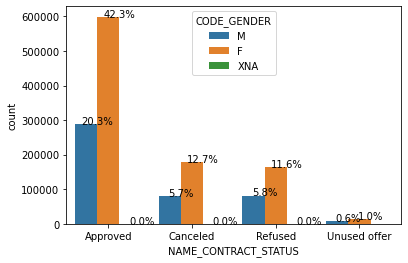

In [178]:
percentage_merge(sns.countplot(x='NAME_CONTRACT_STATUS', hue = 'CODE_GENDER', data = merged_data))

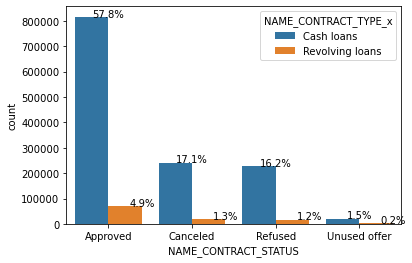

In [179]:
percentage_merge(sns.countplot(x='NAME_CONTRACT_STATUS', hue = 'NAME_CONTRACT_TYPE_x', data = merged_data))

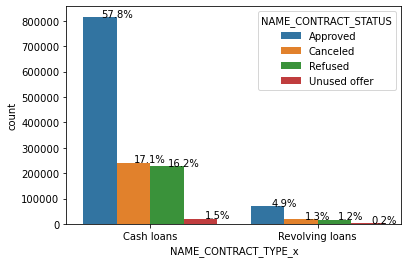

In [180]:
percentage_merge(sns.countplot(x='NAME_CONTRACT_TYPE_x', hue = 'NAME_CONTRACT_STATUS', data = merged_data))

In [181]:
merged_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  \
0      100002       1           Cash loans           M            N               Y             0          202500.0      406597.5        24700.5           351000.0     Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801   25.920548            637            -3648.0            -2120           1               1                0                 1           1           0        Laborers              1.0                     2                            2                    WEDNESDAY                         10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.262949      0.139376                       0.9722         0.0833                        0.9722          0.0833                        0.9722          0.0833          0.0149                  No                       2.0   
1      100003       0           Cash loans           F            N               N             0          270000.0     1293502.5        35698.5          1129500.0            Family    State servant               Higher education               Married  House / apartment                    0.003541   45.931507           1188            -1186.0             -291           1               1                0                 1           1           0      Core staff              2.0                     1                            1                       MONDAY                         11                           0                           0                            0                       0                       0                        0                  School      0.622246      0.535276                       0.9851         0.2917                        0.9851          0.2917                        0.9851          0.2917          0.0714                  No                       1.0   
2      100003       0           Cash loans           F            N               N             0          270000.0     1293502.5        35698.5          1129500.0            Family    State servant               Higher education               Married  House / apartment                    0.003541   45.931507           1188            -1186.0             -291           1               1                0                 1           1           0      Core staff              2.0                     1                            1                       MONDAY                         11                           0                           0                            0                       0                       0                        0                  School      0.622246      0.535276                       0.9851         0.2917                        0.9851          0.2917                        0.9851          0.2917          0.0714                  No                       1.0   
3  

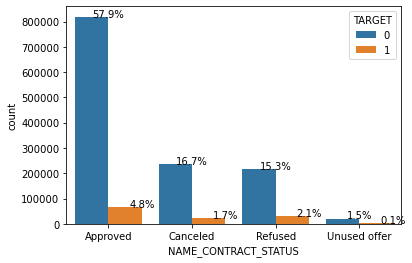

In [182]:
percentage_merge(sns.countplot(x='NAME_CONTRACT_STATUS', hue = 'TARGET', data = merged_data))

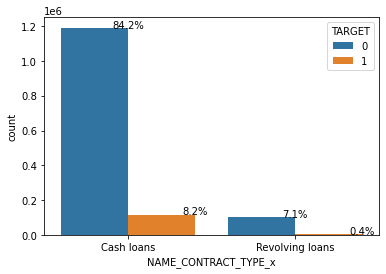

In [183]:
percentage_merge(sns.countplot(x='NAME_CONTRACT_TYPE_x', hue = 'TARGET', data = merged_data))

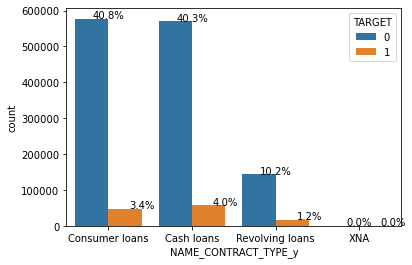

In [184]:
percentage_merge(sns.countplot(x='NAME_CONTRACT_TYPE_y', hue = 'TARGET', data = merged_data))

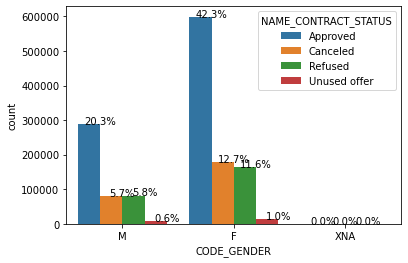

In [185]:
percentage_merge(sns.countplot(x='CODE_GENDER', hue = 'NAME_CONTRACT_STATUS', data = merged_data))

In [186]:
# percentage_merge(sns.countplot(x='AMT_ANNUITY_y', hue = 'TARGET', data = merged_data))

In [187]:
# percentage_merge(sns.countplot(x='AMT_APPLICATION', hue = 'TARGET', data = merged_data))

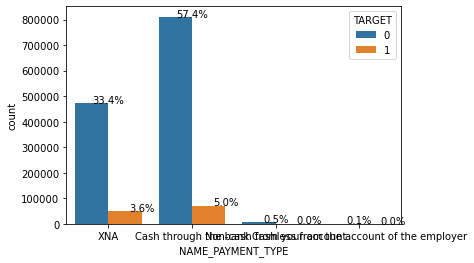

In [188]:
percentage_merge(sns.countplot(x='NAME_PAYMENT_TYPE', hue = 'TARGET', data = merged_data))

In [189]:
percentage_merge(sns.countplot(x='NAME_CLIENT_TYPE', hue = 'TARGET', data = merged_data))

In [190]:
percentage_merge(sns.countplot(x='WEEKDAY_APPR_PROCESS_START_x', hue = 'TARGET', data = merged_data))

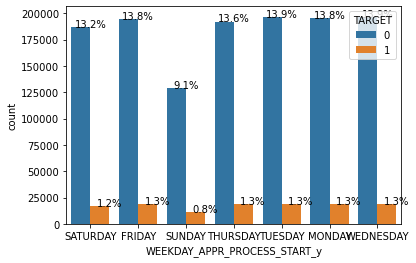

In [191]:
percentage_merge(sns.countplot(x='WEEKDAY_APPR_PROCESS_START_y', hue = 'TARGET', data = merged_data))

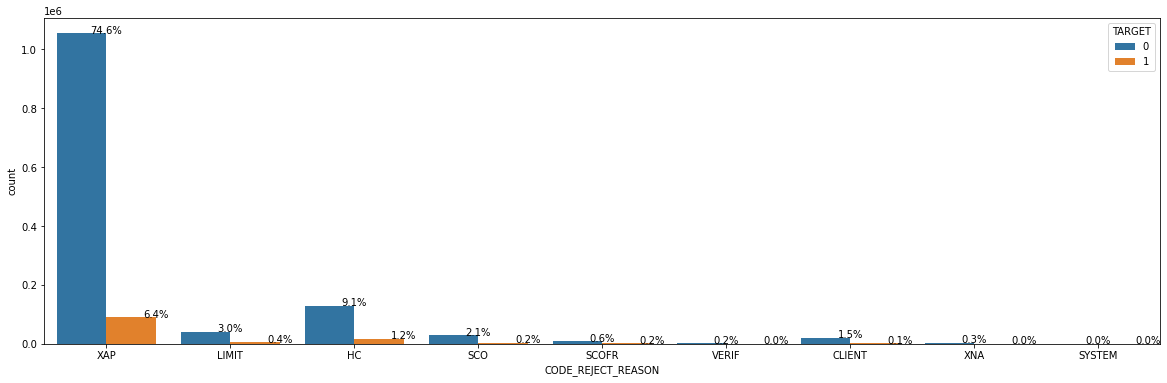

In [192]:
plt.figure(figsize=[20,6])
percentage_merge(sns.countplot(x='CODE_REJECT_REASON', hue = 'TARGET', data = merged_data))

In [193]:
list(merged_data.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE_x',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT_x',
 'AMT_ANNUITY_x',
 'AMT_GOODS_PRICE_x',
 'NAME_TYPE_SUITE_x',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START_x',
 'HOUR_APPR_PROCESS_START_x',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'F

In [194]:
# application_data['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_WORK_CITY', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'TARGET'].corr()

In [195]:
c = df1.corr()
c

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  \
SK_ID_CURR                      1.000000     NaN     -0.000716          0.001739   -0.000342     0.000071        -0.000235                    0.000360    0.001346       0.001744          -0.001475        -0.000077    0.002925       -0.001717        -0.000854          0.003319    0.001408    0.000229        -0.002789             -0.000519                    -0.000739                -0.000115                    0.000104                    0.000836                     0.002784               -0.002885               -0.001696                 0.000428      0.001570      0.000244                     0.000866       0.002867                      0.001038        0.002637                      0.000686        0.002673        0.001521                 -0.000697                  0.000553                 -0.000743                  0.002375               -0.000999         0.001342        -0.003217        -0.004321        -0.001426         0.001972        -0.003047         0.001618         0.002007   
TARGET                               NaN     NaN           NaN               NaN         NaN          NaN              NaN                         NaN         NaN            NaN                NaN              NaN         NaN             NaN              NaN               NaN         NaN         NaN              NaN                   NaN                          NaN                      NaN                         NaN                         NaN                          NaN                     NaN                     NaN                      NaN           NaN           NaN                          NaN            NaN                           NaN             NaN                           NaN             NaN             NaN                       NaN                       NaN                       NaN                       NaN                     NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN   
CNT_CHILDREN                   -0.000716     NaN      1.000000          0.027397    0.003081     0.020909        -0.000559                   -0.024363   -0.336966      -0.245174           0.185792        -0.028751    0.001080        0.244274         0.055453         -0.001201   -0.029929    0.023460         0.878571              0.022842                     0.021866                -0.005244                   -0.012342                    0.010857                     0.017326                0.021587                0.072193                 0.070988     -0.015438     -0.038306                     0.006588      -0.015745                      0.006204       -0.015129                      0.006209       -0.015502       -0.012591                  0.014532                 -0.002193                  0.014199                 -0.002125               -0.008501         0.003736         0.055718        -0.003833        -0.016239        -0.158963        -0.001442         0.053919        -0.002358   
AMT_INCOME_TOTAL                0.

In [196]:
s = c.abs().unstack()
so = s.sort_values(kind="quicksort").dropna()
so

FLAG_DOCUMENT_15              AMT_REQ_CREDIT_BUREAU_HOUR      2.064400e-07
AMT_REQ_CREDIT_BUREAU_HOUR    FLAG_DOCUMENT_15                2.064400e-07
FLAG_DOCUMENT_2               EXT_SOURCE_2                    1.205984e-06
EXT_SOURCE_2                  FLAG_DOCUMENT_2                 1.205984e-06
AMT_REQ_CREDIT_BUREAU_YEAR    AMT_REQ_CREDIT_BUREAU_HOUR      2.812020e-06
AMT_REQ_CREDIT_BUREAU_HOUR    AMT_REQ_CREDIT_BUREAU_YEAR      2.812020e-06
FLAG_DOCUMENT_12              FLAG_MOBIL                      5.002798e-06
FLAG_MOBIL                    FLAG_DOCUMENT_12                5.002798e-06
AMT_REQ_CREDIT_BUREAU_DAY     DAYS_REGISTRATION               9.268956e-06
DAYS_REGISTRATION             AMT_REQ_CREDIT_BUREAU_DAY       9.268956e-06
FLAG_DOCUMENT_10              FLAG_MOBIL                      9.359462e-06
FLAG_MOBIL                    FLAG_DOCUMENT_10                9.359462e-06
FLAG_DOCUMENT_2               FLAG_MOBIL                      1.061267e-05
FLAG_MOBIL               

In [197]:
c1 = df2.corr()
c1

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  \
SK_ID_CURR                      1.000000     NaN     -0.005144         -0.010165   -0.001290    -0.007578        -0.001814                    0.006301    0.001254      -0.005161           0.006342        -0.002539         NaN        0.005248         0.004970         -0.003039    0.018246    0.000831        -0.003816             -0.005936                    -0.004135                 0.005004                   -0.004249                    0.004120                     0.004303                0.008328                0.000787                -0.002929      0.006388     -0.004144                     0.003119       0.011749                      0.004136        0.010260                      0.003482        0.011782        0.005621                 -0.009424                 -0.005567                 -0.009087                 -0.009440                0.002455        -0.002291        -0.004640              NaN         0.002669         0.003320         0.002342         0.003887        -0.005247   
TARGET                               NaN     NaN           NaN               NaN         NaN          NaN              NaN                         NaN         NaN            NaN                NaN              NaN         NaN             NaN              NaN               NaN         NaN         NaN              NaN                   NaN                          NaN                      NaN                         NaN                         NaN                          NaN                     NaN                     NaN                      NaN           NaN           NaN                          NaN            NaN                           NaN             NaN                           NaN             NaN             NaN                       NaN                       NaN                       NaN                       NaN                     NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN   
CNT_CHILDREN                   -0.005144     NaN      1.000000          0.004796   -0.001675     0.031257        -0.008111                   -0.031975   -0.259109      -0.192864           0.149154        -0.032299         NaN        0.192469         0.051712          0.003592   -0.024306    0.013902         0.885484              0.040680                     0.043185                -0.023899                   -0.024322                   -0.020793                    -0.012073               -0.001174                0.046115                 0.053515     -0.012090     -0.024512                     0.005566      -0.021437                      0.005469       -0.020306                      0.005372       -0.021101       -0.017176                  0.025909                  0.001520                  0.025285                 -0.005039                0.011547        -0.007779         0.060561              NaN        -0.022138        -0.129482        -0.001895         0.028766         0.003591   
AMT_INCOME_TOTAL               -0.

In [198]:
s = c1.abs().unstack()
so = s.sort_values(kind="quicksort").dropna()
so

YEARS_BEGINEXPLUATATION_MEDI  DAYS_ID_PUBLISH                 0.000006
DAYS_ID_PUBLISH               YEARS_BEGINEXPLUATATION_MEDI    0.000006
YEARS_BEGINEXPLUATATION_MEDI  AMT_REQ_CREDIT_BUREAU_MON       0.000009
AMT_REQ_CREDIT_BUREAU_MON     YEARS_BEGINEXPLUATATION_MEDI    0.000009
FLAG_DOCUMENT_20              REGION_RATING_CLIENT            0.000010
REGION_RATING_CLIENT          FLAG_DOCUMENT_20                0.000010
LIVE_REGION_NOT_WORK_REGION   REG_CITY_NOT_LIVE_CITY          0.000011
REG_CITY_NOT_LIVE_CITY        LIVE_REGION_NOT_WORK_REGION     0.000011
AMT_REQ_CREDIT_BUREAU_DAY     FLAG_DOCUMENT_16                0.000016
FLAG_DOCUMENT_16              AMT_REQ_CREDIT_BUREAU_DAY       0.000016
LIVE_CITY_NOT_WORK_CITY       YEARS_BEGINEXPLUATATION_MODE    0.000018
YEARS_BEGINEXPLUATATION_MODE  LIVE_CITY_NOT_WORK_CITY         0.000018
OBS_60_CNT_SOCIAL_CIRCLE      FLAG_DOCUMENT_6                 0.000027
FLAG_DOCUMENT_6               OBS_60_CNT_SOCIAL_CIRCLE        0.000027
FLAG_D